# 0 Load data

In [3]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# all the dataframes are clipped to the US states 


df_economic = pd.read_csv('data/US_data/df_economic.csv')
df_weight = pd.read_csv('data/US_data/df_weight.csv')
df_strategies = pd.read_csv('data/US_data/df_strategies.csv')
df_net_benefit = pd.read_csv('data/US_data/df_net_benefit.csv')
df_pv_npv = pd.read_csv('data/US_data/df_pv_npv.csv')
df_agricultural_npv = pd.read_csv('data/US_data/df_agricultural_npv.csv')
df_afforestation_npv = pd.read_csv('data/US_data/df_afforestation_npv.csv')
df_natural_npv = pd.read_csv('data/US_data/df_natural_npv.csv')
df_pixel_optimized_data = pd.read_csv('data/US_data/df_pixel_optimized_data.csv')
df_mlp_scores = pd.read_csv('data/US_data/df_mlp_scores.csv')

us_nation = gpd.read_file(r'data\US_data\cb_2018_us_nation_5m.shp')
us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')
us_counties = gpd.read_file('data/cb_2018_us_county_500k.shp')


us_nation_4326 = us_nation.to_crs('EPSG:4326')
us_states_4326 = us_states.to_crs('EPSG:4326')
us_counties_4326 = us_counties.to_crs('EPSG:4326')

In [4]:
df_pixel_optimized_data

lon        lat       avg_npv  predicted_prob  \
0     -124.370834  47.954166 -9.371520e+05        0.045891   
1     -124.212500  40.570835  5.553589e+04        0.968293   
2     -124.204170  40.562500  1.223183e+04        0.960158   
3     -123.679170  48.120834 -1.048014e+06        0.277199   
4     -123.629166  48.120834 -1.145627e+06        0.229049   
...           ...        ...           ...             ...   
64977  -67.829170  46.887500 -9.098034e+05        0.999332   
64978  -67.829170  46.920834 -9.480477e+05        0.999058   
64979  -67.812500  46.312500 -9.327203e+05        0.999880   
64980  -67.804170  46.762500 -9.530168e+05        0.999813   
64981  -67.795830  46.320835 -9.298485e+05        0.999882   

       Expectation_net_benefit  optimal_weight_economic  \
0                  3586.953880             1.000000e+00   
1                  4761.501756             0.000000e+00   
2                  4719.930203             4.475587e-16   
3                  3627.954974             4.163336e-16   
4                  3521.462384             0.000000e+00   
...                        ...                      ...   
64977              4014.829581             0.000000e+00   
64978              3966.378972             0.000000e+00   
64979              3986.595370             0.000000e+00   
64980              4000.470365             0.000000e+00   
64981              3989.340489             5.551115e-17   

       optimal_weight_environmental  optimal_weight_emission  ccd_optimized  \
0                               0.0             3.747003e-16       0.367652   
1                               1.0             0.000000e+00       0.889508   
2                               1.0             0.000000e+00       0.883643   
3                               1.0             5.412337e-16       0.401518   
4                               1.0             0.000000e+00       0.384378   
...                             ...                      ...            ...   
64977                           1.0             2.775558e-17       0.757982   
64978                           1.0             0.000000e+00       0.750965   
64979                           1.0             0.000000e+00       0.753910   
64980                           1.0             0.000000e+00       0.753451   
64981                           1.0             0.000000e+00       0.754358   

       coupling_degree  coordination_degree  weight_deviation_economic  \
0             0.996364             0.135661                   0.666667   
1             0.982499             0.805318                  -0.333333   
2             0.978133             0.798280                  -0.333333   
3             0.987139             0.163317                  -0.333333   
4             0.990424             0.149175                  -0.333333   
...                ...                  ...                        ...   
64977         0.691778             0.830521                  -0.333333   
64978         0.679202             0.830309                  -0.333333   
64979         0.684019             0.830942                  -0.333333   
64980         0.683229             0.830891                  -0.333333   
64981         0.684832             0.830944                  -0.333333   

       weight_deviation_environmental  weight_deviation_emission  \
0                           -0.333333                  -0.333333   
1                            0.666667                  -0.333333   
2                            0.666667                  -0.333333   
3                            0.666667                  -0.333333   
4                            0.666667                  -0.333333   
...                               ...                        ...   
64977                        0.666667                  -0.333333   
64978                        0.666667                  -0.333333   
64979                        0.666667                  -0.333333   
64980                        0.666667     

# 1 Generate csv for US state 

Logic is: 

to generate cvs for US state, this csv is like 

对于pv installed， Environmental suitability /ha ， Emission mitigation / ha ，Economic NPV /ha ，Power generation / ha。

first, group state  'area_m2' use sum , this is variable [abandoned land (ha) ] for each state 

second, for each state and use 'predicted_prob' * 'area_m2' in every row, and sum them to calculate cumulative , 

finally, next use this sum/[abandoned land (ha) ] to caculate averge effect in each state 



| State name | abandoned land (ha) | pv installed  | Environmental suitability /ha | Emission mitigation / ha | Economic NPV /ha| Power generation /ha  | CCD Mean improvement |
|------------|---------------------|--------------|--------------------|-----------------|--------------|--------------|--------------|
|   Row1     |   Row1              |   Row1       |   Row1             |   Row1          |   Row1       |   Row1       |   Row1       |
|   Row2     |   Row2              |   Row2       |   Row2             |   Row2          |   Row2       |   Row2       |   Row2       |


In [6]:
df_pixel_optimized_data.loc[(df_pixel_optimized_data['lat'] == 25.295834) & (df_pixel_optimized_data['lon'] == -80.287500), 'Expectation_net_benefit']

57294    4758.781908
Name: Expectation_net_benefit, dtype: float64

## 1.1 Adjust PV carbon density (Important)

In [47]:
df_pixel_optimized_data

lon        lat       avg_npv  predicted_prob  \
0     -124.370834  47.954166 -9.371520e+05        0.045891   
1     -124.212500  40.570835  5.553589e+04        0.968293   
2     -124.204170  40.562500  1.223183e+04        0.960158   
3     -123.679170  48.120834 -1.048014e+06        0.277199   
4     -123.629166  48.120834 -1.145627e+06        0.229049   
...           ...        ...           ...             ...   
64977  -67.829170  46.887500 -9.098034e+05        0.999332   
64978  -67.829170  46.920834 -9.480477e+05        0.999058   
64979  -67.812500  46.312500 -9.327203e+05        0.999880   
64980  -67.804170  46.762500 -9.530168e+05        0.999813   
64981  -67.795830  46.320835 -9.298485e+05        0.999882   

       Expectation_net_benefit  optimal_weight_economic  \
0                  3586.953880             1.000000e+00   
1                  4761.501756             0.000000e+00   
2                  4719.930203             4.475587e-16   
3                  3627.954974             4.163336e-16   
4                  3521.462384             0.000000e+00   
...                        ...                      ...   
64977              4014.829581             0.000000e+00   
64978              3966.378972             0.000000e+00   
64979              3986.595370             0.000000e+00   
64980              4000.470365             0.000000e+00   
64981              3989.340489             5.551115e-17   

       optimal_weight_environmental  optimal_weight_emission  ccd_optimized  \
0                               0.0             3.747003e-16       0.367652   
1                               1.0             0.000000e+00       0.889508   
2                               1.0             0.000000e+00       0.883643   
3                               1.0             5.412337e-16       0.401518   
4                               1.0             0.000000e+00       0.384378   
...                             ...                      ...            ...   
64977                           1.0             2.775558e-17       0.757982   
64978                           1.0             0.000000e+00       0.750965   
64979                           1.0             0.000000e+00       0.753910   
64980                           1.0             0.000000e+00       0.753451   
64981                           1.0             0.000000e+00       0.754358   

       coupling_degree  coordination_degree  weight_deviation_economic  \
0             0.996364             0.135661                   0.666667   
1             0.982499             0.805318                  -0.333333   
2             0.978133             0.798280                  -0.333333   
3             0.987139             0.163317                  -0.333333   
4             0.990424             0.149175                  -0.333333   
...                ...                  ...                        ...   
64977         0.691778             0.830521                  -0.333333   
64978         0.679202             0.830309                  -0.333333   
64979         0.684019             0.830942                  -0.333333   
64980         0.683229             0.830891                  -0.333333   
64981         0.684832             0.830944                  -0.333333   

       weight_deviation_environmental  weight_deviation_emission  \
0                           -0.333333                  -0.333333   
1                            0.666667                  -0.333333   
2                            0.666667                  -0.333333   
3                            0.666667                  -0.333333   
4                            0.666667                  -0.333333   
...                               ...                        ...   
64977                        0.666667                  -0.333333   
64978                        0.666667                  -0.333333   
64979                        0.666667                  -0.333333   
64980                        0.666667     

In [ ]:
import numpy as np

# 这里所合并的信息在inital的版本较为全面，如果考虑到后期呈现问题，直接Drop即可

emission_intensity = pd.DataFrame({
    'year': ['2018',  '2030', '2035', '2040'],
    'CO2_g_per_kWh': [400.3,  302,  279.2, 261.1]
})



df_weight['LNCS_expect'] = (
    df_weight['final_forest'] * df_weight['weighted_density_Forest'] +
    df_weight['final_agro'] * df_weight['weighted_density_Agricultural'] +
    df_strategies['final_veg'] * df_weight['weighted_density_Vegetation']
)

# 数据处理，df_net_benefit提取sites的面积信息、发电量（PIXEL为单位），pv_potential_dens是转化为碳的计算方式
# df_weight 提取环境变量 predicted_prob与Expectation_net_benefit
# df_economic 提取经济变量 net_npv_usd
power_data = df_net_benefit[['lat', 'lon', 'area_m2','E_yr_pixel']].copy()
env_data = df_weight[['lat', 'lon', 'predicted_prob','gmm_density','sample_type']].copy()
emission_data = df_weight[['lat', 'lon', 'Expectation_net_benefit','pv_potential_dens','LNCS_expect']].copy()
economic_2050 = df_economic[df_economic['analysis_year'] == 2050]
avg_npv = economic_2050.groupby(['lat', 'lon'])['net_npv_usd'].mean().reset_index()
ccd_data = df_pixel_optimized_data[['lat', 'lon', 'ccd_optimized']].copy()


merged_data_for_analysis = (
    env_data
    .merge(emission_data, on=['lat', 'lon'], how='outer')
    .merge(avg_npv, on=['lat', 'lon'], how='outer')
    .merge(power_data, on=['lat', 'lon'], how='outer')
    .merge(ccd_data, on=['lat', 'lon'], how='outer')
)



In [ ]:
# Transform pv_transform (2020 emission factor) to 2030, 2040, 2050 using emission_intensity
pv_transform_2020 = 352  
# Interpolate emission intensity for 2020, 2030, 2040, 2050
years_target = [2020, 2030, 2040, 2050]
em_factors = np.interp(
    years_target,
    emission_intensity['year'].astype(int),
    emission_intensity['CO2_g_per_kWh']
)

# Calculate scaling factors relative to 2020
scaling_factors = em_factors / em_factors[0]

# 生成一个pv_transfer的dataframe
pv_transfer = pd.DataFrame({
    'year': [2020, 2030, 2040, 2050],
    'pv_transform': [pv_transform_2020] + list(pv_transform_2020 * scaling_factors[1:])
})

# 计算每10年区间的累计光伏转化能力，并最终汇总到2050
years = [2020, 2030, 2040, 2050]

for idx in range(len(years)-1):
    y_start, y_end = years[idx], years[idx+1]
    pv_start = pv_transfer.loc[pv_transfer['year'] == y_start, 'pv_transform'].values[0]
    pv_end = pv_transfer.loc[pv_transfer['year'] == y_end, 'pv_transform'].values[0]
    # 线性插值每年pv_transform，累计10年
    pv_sum = 0
    for y in range(y_start, y_end):
        pv_y = pv_start + (pv_end - pv_start) * (y - y_start) / (y_end - y_start)
        pv_sum += merged_data_for_analysis['E_yr_pixel'] * pv_y / 1000 / 1000 * 0.27 / (merged_data_for_analysis['area_m2'] / 10000)
    merged_data_for_analysis[f'pv_potential_{y_start}_{y_end-1}_sum'] = pv_sum

# 汇总2020-2050累计值，汇总site的累计光伏减排能力(t C)
merged_data_for_analysis['pv_potential_total(t)'] = sum(
    merged_data_for_analysis[f'pv_potential_{years[i]}_{years[i+1]-1}_sum'] for i in range(len(years)-1)
)

merged_data_for_analysis['power_generation_kwha'] = merged_data_for_analysis['E_yr_pixel'] * 30 / merged_data_for_analysis['area_m2'] * 10000

In [ ]:
merged_data_for_analysis['Expectation_net_benefit_adjust'] = merged_data_for_analysis['pv_potential_total(t)'] - merged_data_for_analysis['LNCS_expect']


In [ ]:
merged_data_for_analysis.drop(columns=['pv_potential_2040_2049_sum','pv_potential_2030_2039_sum','pv_potential_2020_2029_sum'], inplace=True)
merged_data_for_analysis

lat         lon  predicted_prob   gmm_density      sample_type  \
0      25.295834  -80.287500        0.000000  3.874315e+16  negative_sample   
1      25.437500  -80.537500        0.046746  2.054387e+18       prediction   
2      25.437500  -80.495834        0.000000  4.247702e+15  negative_sample   
3      25.445833  -80.454170        0.000000  1.117299e+13  negative_sample   
4      25.445833  -80.404170        0.017465  4.463459e+17       prediction   
...          ...         ...             ...           ...              ...   
64977  48.995834 -111.970830        0.026153  1.493778e+17       prediction   
64978  48.995834 -110.345830        0.068266  4.120084e+17       prediction   
64979  48.995834 -106.020836        0.065097  3.232082e+17       prediction   
64980  48.995834 -104.087500        0.109234  6.627032e+21       prediction   
64981  48.995834 -104.079170        0.196317  6.469832e+18       prediction   

       Expectation_net_benefit  pv_potential_dens  LNCS_expect    net_npv_usd  \
0                  6382.303639        7191.865919   809.562299  407275.912577   
1                  5690.624063        7035.368191  1344.744161  283953.326746   
2                  6055.300591        7024.124059   968.823440  275019.106094   
3                  6048.645138        7017.640780   968.995616  269947.631894   
4                  6081.010322        7045.490473   964.480123  291620.314126   
...                        ...                ...          ...            ...   
64977              6210.923349        6392.674772   181.751426 -220868.055076   
64978              6206.053157        6395.853979   189.800818 -219393.096487   
64979              6204.952188        6412.037900   207.085706 -205704.827949   
64980              6077.421747        6292.888713   215.466966 -300314.323514   
64981              6083.031871        6300.324426   217.292557 -294315.333974   

             area_m2    E_yr_pixel  pv_potential_total(t)  \
0      776295.361002  1.958127e+08            5568.344207   
1      775385.854124  1.913273e+08            5447.174926   
2      775385.854124  1.910215e+08            5438.469092   
3      775332.207938  1.908320e+08            5433.449375   
4      775332.207938  1.915894e+08            5455.012162   
...              ...           ...                    ...   
64977  563356.382622  1.263101e+08            4949.565792   
64978  563356.382622  1.263729e+08            4952.027311   
64979  563356.382622  1.266927e+08            4964.557807   
64980  563356.382622  1.243385e+08            4872.305853   
64981  563356.382622  1.244854e+08            4878.062997   

       power_generation_kwha  Expectation_net_benefit_adjust  ccd_optimized  
0               7.567199e+07                     4758.781908       0.813290  
1               7.402534e+07                     4102.430766       0.755979  
2               7.390703e+07                     4469.645652       0.785107  
3               7.383881e+07                     4464.453759       0.783940  
4               7.413184e+07                     4490.532039       0.790277  
...                      ...                             ...            ...  
64977           6.726299e+07                     4767.814366       0.653804  
64978           6.729644e+07                     4762.226494       0.653879  
64979           6.746673e+07                     4757.472100       0.650767  
64980           6.621305e+07                     4656.838886       0.611981  
64981           6.629129e+07                     4660.770440       0.620538  

[64982 rows x 15 columns]

In [ ]:
# merged_data_for_analysis.to_csv('data/US_data/df_merged_data_for_analysis.csv', index=False)

In [92]:
df_weight.drop(columns=['Expectation_net_benefit'], inplace=True)
df_weight.drop(columns=['pv_potential_dens'], inplace=True)


In [ ]:
# df_weight.to_csv('data/US_data/df_weight.csv', index=False)

## 1.2 Statistic for State-level 

In [1]:
import pandas as pd 

merged_data_for_analysis = pd.read_csv('data/US_data/df_merged_data_for_analysis.csv')

In [ ]:
# merged = pd.merge(merged_data_for_analysis, df_pixel_optimized_data[['lat', 'lon', 'ccd_optimized']], on=['lat', 'lon'], how='left')
# merged.to_csv('data/US_data/df_merged_data_for_analysis.csv', index=False)

In [2]:
merged_data_for_analysis

lat         lon  predicted_prob   gmm_density      sample_type  \
0      25.295834  -80.287500        0.000000  3.874315e+16  negative_sample   
1      25.437500  -80.537500        0.046746  2.054387e+18       prediction   
2      25.437500  -80.495834        0.000000  4.247702e+15  negative_sample   
3      25.445833  -80.454170        0.000000  1.117299e+13  negative_sample   
4      25.445833  -80.404170        0.017465  4.463459e+17       prediction   
...          ...         ...             ...           ...              ...   
64977  48.995834 -111.970830        0.026153  1.493778e+17       prediction   
64978  48.995834 -110.345830        0.068266  4.120084e+17       prediction   
64979  48.995834 -106.020836        0.065097  3.232082e+17       prediction   
64980  48.995834 -104.087500        0.109234  6.627032e+21       prediction   
64981  48.995834 -104.079170        0.196317  6.469832e+18       prediction   

       Expectation_net_benefit  pv_potential_dens  LNCS_expect    net_npv_usd  \
0                  6382.303639        7191.865919   809.562299  407275.912577   
1                  5690.624063        7035.368191  1344.744161  283953.326746   
2                  6055.300591        7024.124059   968.823440  275019.106094   
3                  6048.645138        7017.640780   968.995616  269947.631894   
4                  6081.010322        7045.490473   964.480123  291620.314126   
...                        ...                ...          ...            ...   
64977              6210.923349        6392.674772   181.751426 -220868.055076   
64978              6206.053157        6395.853979   189.800818 -219393.096487   
64979              6204.952188        6412.037900   207.085706 -205704.827949   
64980              6077.421747        6292.888713   215.466966 -300314.323514   
64981              6083.031871        6300.324426   217.292557 -294315.333974   

             area_m2    E_yr_pixel  pv_potential_total(t)  \
0      776295.361002  1.958127e+08            5568.344207   
1      775385.854124  1.913273e+08            5447.174926   
2      775385.854124  1.910215e+08            5438.469092   
3      775332.207938  1.908320e+08            5433.449375   
4      775332.207938  1.915894e+08            5455.012162   
...              ...           ...                    ...   
64977  563356.382622  1.263101e+08            4949.565792   
64978  563356.382622  1.263729e+08            4952.027311   
64979  563356.382622  1.266927e+08            4964.557807   
64980  563356.382622  1.243385e+08            4872.305853   
64981  563356.382622  1.244854e+08            4878.062997   

       power_generation_kwha  Expectation_net_benefit_adjust  ccd_optimized  
0               7.567199e+07                     4758.781908       0.813290  
1               7.402534e+07                     4102.430766       0.755979  
2               7.390703e+07                     4469.645652       0.785107  
3               7.383881e+07                     4464.453759       0.783940  
4               7.413184e+07                     4490.532039       0.790277  
...                      ...                             ...            ...  
64977           6.726299e+07                     4767.814366       0.653804  
64978           6.729644e+07                     4762.226494       0.653879  
64979           6.746673e+07                     4757.472100       0.650767  
64980           6.621305e+07                     4656.838886       0.611981  
64981           6.629129e+07                     4660.770440       0.620538  

[64982 rows x 15 columns]

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

def generate_state_level_csv(merged_data_for_analysis, us_states_4326, output_path='data/US_data/US_analysis_reslut/state_level_analysis.csv'):
    """
    生成州级统计CSV，按照指定逻辑计算各指标
    
    逻辑：
    1. 按州分组，计算总废弃土地面积 (abandoned land ha)
    2. 对每个州，计算各指标的加权平均 (密度 × 面积，然后除以总面积)
    3. 输出标准化的州级统计表
    """
    
    # 1. 添加州标签
    print("正在添加州标签...")
    geometry = [Point(xy) for xy in zip(merged_data_for_analysis['lon'], merged_data_for_analysis['lat'])]
    pixel_gdf = gpd.GeoDataFrame(merged_data_for_analysis, geometry=geometry, crs='EPSG:4326')
    pixel_with_states = gpd.sjoin(pixel_gdf, us_states_4326, how='left', predicate='within')
    
    # 移除几何列，保留数据
    data_with_states = pixel_with_states.drop(columns=['geometry']).copy()
    
    # 2. 按州分组计算统计
    print("正在计算州级统计...")
    
    def calculate_state_metrics(group):
        """计算单个州的指标"""
        # 基础信息
        state_name = group['NAME'].iloc[0] if not group['NAME'].isna().all() else 'Unknown'
        
        # 先转换面积单位：m² -> ha
        area_ha = group['area_m2'] / 10000
        total_area_ha = area_ha.sum()
        
        # 各指标的加权平均计算
        # 使用密度 × 面积(ha)，然后除以总面积(ha)得到加权平均
        
        metrics = {
            'State_name': state_name,
            'abandoned_land_ha': total_area_ha,
        }
        
        # Environmental suitability /ha (predicted_prob的加权平均)
        if 'predicted_prob' in group.columns:
            env_weighted_sum = (group['predicted_prob'] * area_ha).sum()
            metrics['Environmental_suitability_per_ha'] = env_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['Environmental_suitability_per_ha'] = 0
        
        # Emission mitigation /ha (Expectation_net_benefit的加权平均)
        if 'Expectation_net_benefit' in group.columns:
            emission_weighted_sum = (group['Expectation_net_benefit'] * area_ha).sum()
            metrics['Emission_mitigation_per_ha'] = emission_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['Emission_mitigation_per_ha'] = 0
        
        # Economic NPV /ha (avg_npv的加权平均)
        if 'net_npv_usd' in group.columns:
            economic_weighted_sum = (group['net_npv_usd'] * area_ha).sum()
            metrics['Economic_NPV_per_ha'] = economic_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['Economic_NPV_per_ha'] = 0
        
        # Power generation /ha (E_yr_pixel的加权平均)
        if 'E_yr_pixel' in group.columns:
            power_weighted_sum = (group['E_yr_pixel'] * area_ha).sum()
            metrics['Power_generation_per_ha'] = power_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['Power_generation_per_ha'] = 0
        
        # CCD Mean  (如果有ccd_optimized列)
        if 'ccd_optimized' in group.columns:
            ccd_weighted_sum = (group['ccd_optimized'] * area_ha).sum()
            metrics['CCD_Mean'] = ccd_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['CCD_Mean'] = 0
        
        # # 额外统计信息
        # metrics['pixel_count'] = len(group)
        # metrics['avg_pixel_area_ha'] = area_ha.mean()        
        return pd.Series(metrics)
    
    # 按州分组并计算指标
    state_stats = data_with_states.groupby('NAME', observed=True).apply(calculate_state_metrics).reset_index(drop=True)
    
    # 3. 数据清理和格式化
    print("正在格式化数据...")
    
    # 移除未知州
    state_stats = state_stats[state_stats['State_name'] != 'Unknown'].copy()
    
    # 按废弃土地面积排序
    state_stats = state_stats.sort_values('abandoned_land_ha', ascending=False).reset_index(drop=True)
    
    # 数值格式化
    numeric_columns = [
        'abandoned_land_ha', 'Environmental_suitability_per_ha', 'Emission_mitigation_per_ha',
        'Economic_NPV_per_ha', 'Power_generation_per_ha', 'CCD_Mean', 'avg_pixel_area_ha'
    ]
    
    for col in numeric_columns:
        if col in state_stats.columns:
            state_stats[col] = state_stats[col].round(4)
    
    # 4. 保存CSV
    print(f"正在保存到: {output_path}")
    state_stats.to_csv(output_path, index=False)
    
    # 5. 输出摘要
    print(f"\n州级统计完成！")
    print(f"总州数: {len(state_stats)}")
    print(f"总废弃土地面积: {state_stats['abandoned_land_ha'].sum():.2f} 公顷")
    print(f"平均每州废弃土地面积: {state_stats['abandoned_land_ha'].mean():.2f} 公顷")
    
    # 显示前5个州
    print(f"\n前5个州（按废弃土地面积排序）:")
    display_cols = ['State_name', 'abandoned_land_ha', 'Environmental_suitability_per_ha', 
                   'Emission_mitigation_per_ha', 'Economic_NPV_per_ha']
    print(state_stats[display_cols].head().to_string(index=False))
    
    return state_stats

# 使用示例
if __name__ == "__main__":
    # 假设 merged_data_for_analysis 和 us_states_4326 已经定义
    state_stats_df = generate_state_level_csv(merged_data_for_analysis, us_states_4326)

正在添加州标签...
正在计算州级统计...
正在格式化数据...
正在保存到: data/US_data/state_level_analysis.csv

州级统计完成！
总州数: 48
总废弃土地面积: 4376972.78 公顷
平均每州废弃土地面积: 91186.93 公顷

前5个州（按废弃土地面积排序）:
State_name  abandoned_land_ha  Environmental_suitability_per_ha  Emission_mitigation_per_ha  Economic_NPV_per_ha
     Texas        515459.2186                            0.7860                   6722.3459          262293.9622
  Illinois        291941.0631                            0.8573                   5763.0992         -527071.3078
California        271672.0489                            0.5379                   7481.2128          770496.9652
   Georgia        244587.2796                            0.9510                   6426.1686          -45315.8133
   Indiana        219739.8319                            0.8795                   5644.3213         -605635.6691


C:\Users\zpy10\AppData\Local\Temp\ipykernel_66996\623554085.py:86: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_stats = data_with_states.groupby('NAME', observed=True).apply(calculate_state_metrics).reset_index(drop=True)


In [21]:
state_stats_df

State_name  abandoned_land_ha  Environmental_suitability_per_ha  \
0            Texas        515459.2186                            0.7860   
1         Illinois        291941.0631                            0.8573   
2       California        271672.0489                            0.5379   
3          Georgia        244587.2796                            0.9510   
4          Indiana        219739.8319                            0.8795   
5         Michigan        169962.5463                            0.9372   
6   North Carolina        167767.8295                            0.9584   
7        Wisconsin        156027.1466                            0.8202   
8             Ohio        152707.5281                            0.8538   
9          Florida        151815.8627                            0.4050   
10         Montana        146109.1567                            0.1272   
11       Louisiana        125486.4373                            0.8607   
12        Colorado        108304.7666                            0.6297   
13     Mississippi        103433.1543                            0.9417   
14           Idaho        100557.7773                            0.2364   
15            Utah        100148.1546                            0.4338   
16            Iowa         95021.5640                            0.7820   
17          Kansas         92794.1357                            0.8516   
18        Missouri         91721.0259                            0.8426   
19         Alabama         90928.7176                            0.9203   
20      Washington         85028.1611                            0.1917   
21    Pennsylvania         84346.8373                            0.9398   
22  South Carolina         76434.9813                            0.9634   
23        Arkansas         66401.6090                            0.9378   
24        Nebraska         63229.7777                            0.5418   
25       Tennessee         58137.4921                            0.9008   
26        Kentucky         55512.2594                            0.9042   
27          Oregon         53945.9882                            0.3312   
28        Virginia         51685.1704                            0.8980   
29        New York         51587.6644                            0.9836   
30        Maryland         43750.7910                            0.8533   
31        Oklahoma         42462.0706                            0.7776   
32    South Dakota         35882.5985                            0.4451   
33         Arizona         31179.0909                            0.5886   
34       Minnesota         31096.6789                            0.7326   
35        Delaware         28257.5932                            0.8847   
36      New Jersey         27129.3081                            0.8608   
37         Wyoming         24470.2500                            0.4839   
38      New Mexico         22621.1364                            0.9122   
39    North Dakota         17884.0800                            0.2911   
40          Nevada         11661.7398                            0.4752   
41   West Virginia          5531.9865                            0.9478   
42           Maine          5254.7635                            0.9996   
43   Massachusetts          3880.8036                            0.9938   
44   New Hampshire          1360.4161                            0.9996   
45         Vermont          1287.0734                            0.9991   
46     Connecticut           638.7263                            0.9756   
47    Rhode Island           128.4821                            0.9997   

    Emission_mitigation_per_ha  Economic_NPV_per_ha  Power_generation_per_ha  \
0                    6722.3459         2.622940e+05             1.806962e+08   
1                    5763.0992        -5.270713e+05             1.378208e+08   
2                    7481.2128         7.704970e+05             1.852499e+08   
3           

## 1.3 Statitic for County-level

In [ ]:
def generate_county_level_csv(merged_data_for_analysis, us_counties_4326, output_path='data/US_data/US_analysis_reslut/county_level_analysis.csv'):
    """
    生成县级统计CSV，按照与州级相同的逻辑计算各指标
    """
    print("正在添加县标签...")
    geometry = [Point(xy) for xy in zip(merged_data_for_analysis['lon'], merged_data_for_analysis['lat'])]
    pixel_gdf = gpd.GeoDataFrame(merged_data_for_analysis, geometry=geometry, crs='EPSG:4326')
    pixel_with_counties = gpd.sjoin(pixel_gdf, us_counties_4326, how='left', predicate='within')
    data_with_counties = pixel_with_counties.drop(columns=['geometry']).copy()

    print("正在计算县级统计...")

    def calculate_county_metrics(group):
        county_name = group['NAME'].iloc[0] if not group['NAME'].isna().all() else 'Unknown'
        statefp = group['STATEFP'].iloc[0] if 'STATEFP' in group.columns else ''
        countyfp = group['COUNTYFP'].iloc[0] if 'COUNTYFP' in group.columns else ''
        area_ha = group['area_m2'] / 10000
        total_area_ha = area_ha.sum()
        metrics = {
            'County_name': county_name,
            'STATEFP': statefp,
            'COUNTYFP': countyfp,
            'abandoned_land_ha': total_area_ha,
        }
        if 'predicted_prob' in group.columns:
            env_weighted_sum = (group['predicted_prob'] * area_ha).sum()
            metrics['Environmental_suitability_per_ha'] = env_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['Environmental_suitability_per_ha'] = 0
        if 'Expectation_net_benefit' in group.columns:
            emission_weighted_sum = (group['Expectation_net_benefit'] * area_ha).sum()
            metrics['Emission_mitigation_per_ha'] = emission_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['Emission_mitigation_per_ha'] = 0
        if 'net_npv_usd' in group.columns:
            economic_weighted_sum = (group['net_npv_usd'] * area_ha).sum()
            metrics['Economic_NPV_per_ha'] = economic_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['Economic_NPV_per_ha'] = 0
        if 'E_yr_pixel' in group.columns:
            power_weighted_sum = (group['E_yr_pixel'] * area_ha).sum()
            metrics['Power_generation_per_ha'] = power_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['Power_generation_per_ha'] = 0
        if 'ccd_optimized' in group.columns:
            ccd_weighted_sum = (group['ccd_optimized'] * area_ha).sum()
            metrics['CCD_Mean'] = ccd_weighted_sum / total_area_ha if total_area_ha > 0 else 0
        else:
            metrics['CCD_Mean'] = 0
        return pd.Series(metrics)

    county_stats = data_with_counties.groupby(['STATEFP', 'COUNTYFP', 'NAME'], observed=True).apply(calculate_county_metrics).reset_index(drop=True)
    county_stats = county_stats[county_stats['County_name'] != 'Unknown'].copy()
    county_stats = county_stats.sort_values('abandoned_land_ha', ascending=False).reset_index(drop=True)
    numeric_columns = [
        'abandoned_land_ha', 'Environmental_suitability_per_ha', 'Emission_mitigation_per_ha',
        'Economic_NPV_per_ha', 'Power_generation_per_ha', 'CCD_Mean'
    ]
    for col in numeric_columns:
        if col in county_stats.columns:
            county_stats[col] = county_stats[col].round(4)
    print(f"正在保存到: {output_path}")
    county_stats.to_csv(output_path, index=False)
    print(f"\n县级统计完成！")
    print(f"总县数: {len(county_stats)}")
    print(f"总废弃土地面积: {county_stats['abandoned_land_ha'].sum():.2f} 公顷")
    print(f"平均每县废弃土地面积: {county_stats['abandoned_land_ha'].mean():.2f} 公顷")
    print(f"\n前5个县（按废弃土地面积排序）:")
    display_cols = ['County_name', 'STATEFP', 'COUNTYFP', 'abandoned_land_ha', 'Environmental_suitability_per_ha', 
                   'Emission_mitigation_per_ha', 'Economic_NPV_per_ha']
    print(county_stats[display_cols].head().to_string(index=False))
    return county_stats

# 使用示例
county_stats_df = generate_county_level_csv(merged_data_for_analysis, us_counties_4326)
county_stats_df


正在添加县标签...
正在计算县级统计...
正在保存到: data/US_data/county_level_analysis.csv

县级统计完成！
总县数: 2440
总废弃土地面积: 4376972.78 公顷
平均每县废弃土地面积: 1793.84 公顷

前5个县（按废弃土地面积排序）:
County_name STATEFP COUNTYFP  abandoned_land_ha  Environmental_suitability_per_ha  Emission_mitigation_per_ha  Economic_NPV_per_ha
     Fresno      06      019         38974.1038                            0.5998                   7493.0897          749981.7193
    Hidalgo      48      215         38052.8845                            0.1821                   6713.6434          191699.4433
     Tulare      06      107         33121.2112                            0.4548                   7547.2596          785671.8751
       Will      17      197         31175.2304                            0.7299                   5577.6903         -630879.8341
     Madera      06      039         24980.3094                            0.5779                   7486.6939          774396.9547


C:\Users\zpy10\AppData\Local\Temp\ipykernel_66996\70645452.py:52: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  county_stats = data_with_counties.groupby(['STATEFP', 'COUNTYFP', 'NAME'], observed=True).apply(calculate_county_metrics).reset_index(drop=True)


County_name STATEFP COUNTYFP  abandoned_land_ha  \
0         Fresno      06      019         38974.1038   
1        Hidalgo      48      215         38052.8845   
2         Tulare      06      107         33121.2112   
3           Will      17      197         31175.2304   
4         Madera      06      039         24980.3094   
...          ...     ...      ...                ...   
2435    Red Lake      27      125            57.6248   
2436     Lincoln      30      053            57.1044   
2437      Ramsey      38      071            57.0951   
2438    Boundary      16      021            56.7210   
2439     Rolette      38      079            56.5333   

      Environmental_suitability_per_ha  Emission_mitigation_per_ha  \
0                               0.5998                   7493.0897   
1                               0.1821                   6713.6434   
2                               0.4548                   7547.2596   
3                               0.7299                   5577.6903   
4                               0.5779                   7486.6939   
...                                ...                         ...   
2435                            0.7776                   5498.0444   
2436                            0.0051                   6490.9617   
2437                            0.1975                   5768.0864   
2438                            0.0955                   5812.4662   
2439                            0.2768                   5768.7206   

      Economic_NPV_per_ha  Power_generation_per_ha  CCD_Mean  
0             749981.7193             1.842272e+08    0.9281  
1             191699.4433             1.868898e+08    0.7952  
2             785671.8751             1.865164e+08    0.9002  
3            -630879.8341             1.324124e+08    0.6898  
4             774396.9547             1.838907e+08    0.9255  
...                   ...                      ...       ...  
2435         -699671.8740             1.169154e+08    0.7129  
2436           30097.2262             1.344336e+08    0.7212  
2437         -486375.2171             1.212798e+08    0.5119  
2438         -506724.3453             1.199618e+08    0.5233  
2439         -454316.8137             1.208772e+08    0.5320  

[2440 rows x 9 columns]

## 1.4 Calculate mean improvement of CCD solution

based on the algrithom of def(create_cross_target_analysi和create_combined_cumulative_analysis)


第一模块（州累积曲线绘制模块，主要参考create_combined_cumulative_analysis函数）

计算逻辑大概是（以predicted_prob变量累积为例，这个变量属于Environmental_sustainbility维度）：
首先，在全局按照效益值从高到低排序；其次按照这个排序逐项累加形成累积曲线；
其次，在全局顺序中为每个点增加州的标签State_name，并根据全局的排序，更新各个州的累积状态；
再次，对于其他Expectation_net_benefit，avg_npv执行重复操作；
第四，记录各个solution的排序顺序，在对应三个维度执行累加的重复操作（交叉曲线分析）
（这一步骤类似于        # ==================== 按CCD排序的累积效应曲线 ====================
        ccd_sorted_indices = np.argsort(ccd_values_total)[::-1]
        ccd_sorted_benefits = benefit_total_values[ccd_sorted_indices]
        ccd_cumulative_benefits = np.cumsum(ccd_sorted_benefits)
        ccd_cumulative_percentage = np.arange(1, len(ccd_cumulative_benefits) + 1) / len(ccd_cumulative_benefits) * 100
        
        # 确保从0开始
        ccd_cumulative_benefits = np.concatenate([[0], ccd_cumulative_benefits])
        ccd_cumulative_percentage = np.concatenate([[0], ccd_cumulative_percentage])）
第二模块（州积分统计模块，主要参考create_cross_target_analysi）
第五，一共有3个维度，每个维度有4种排序方案。此时参考create_cross_target_analysis函数中积分计算逻辑，统计各个州从大小到小之后累积曲线在[0,1]之间的积分，以量化它在总体政策效应之中的贡献，又可以提供横向之间比较。

输入数据主要有us_states_4326（各个州的shp数据），predicted_prob（对应Environmental_sustainability）
avg_npv（对应Economic_feasibility维度），Expectation_net_benefit（对应Emission_mitigation_ability维度）


输出一个dataframe,存储了各个州的mean ploicy efficiency
column: 'State_name'; 'Solution Type'; 'Environmental_sustainbility'; 'Emission mitigation ability'; 'Economic feasibility' ; 

Solution type includes : Envrionmental\ Emission mitigation\ Economic \ WCCD 

create_combined_cumulative_analysis给出了一个example:它给出了在单目标最优下各个州的累积路径。

=== 开始州级别累积积分统计分析（简化版）===
正在合并数据...
正在添加州标签...
发现 48 个州
正在处理排序方案: Environmental
  处理维度: Environmental_sustainability
  处理维度: Emission_mitigation_ability
  处理维度: Economic_feasibility
正在处理排序方案: Emission_mitigation
  处理维度: Environmental_sustainability
  处理维度: Emission_mitigation_ability
  处理维度: Economic_feasibility
正在处理排序方案: Economic
  处理维度: Environmental_sustainability
  处理维度: Emission_mitigation_ability
  处理维度: Economic_feasibility
正在处理排序方案: WCCD
  处理维度: Environmental_sustainability
  处理维度: Emission_mitigation_ability
  处理维度: Economic_feasibility
正在格式化结果...
正在绘制各州累积曲线...
已保存: data/US_data/US_analysis_reslut/state_cumulative_curves_predicted_prob_simplified.png


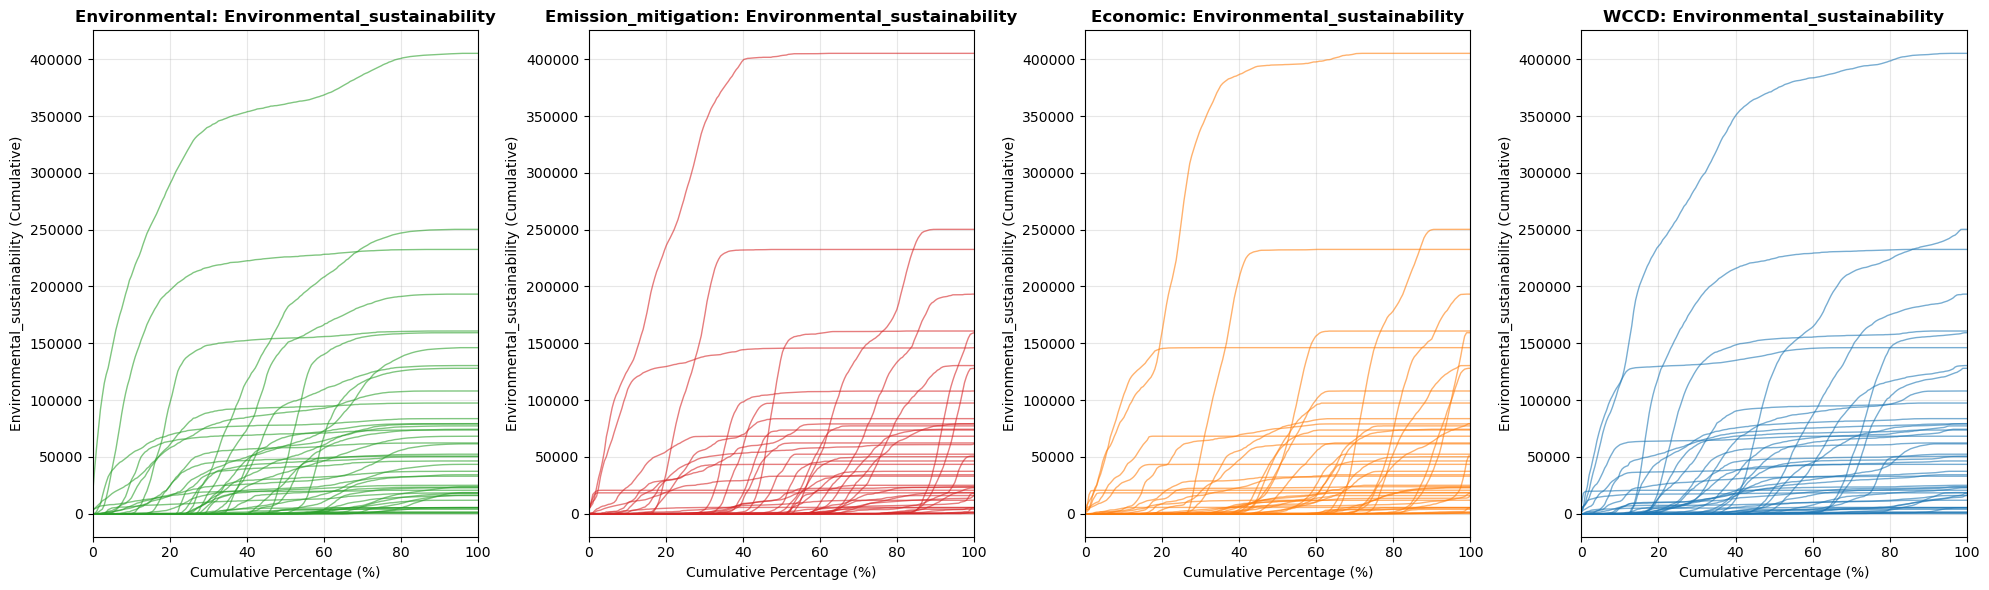

已保存: data/US_data/US_analysis_reslut/state_cumulative_curves_Expectation_net_benefit_simplified.png


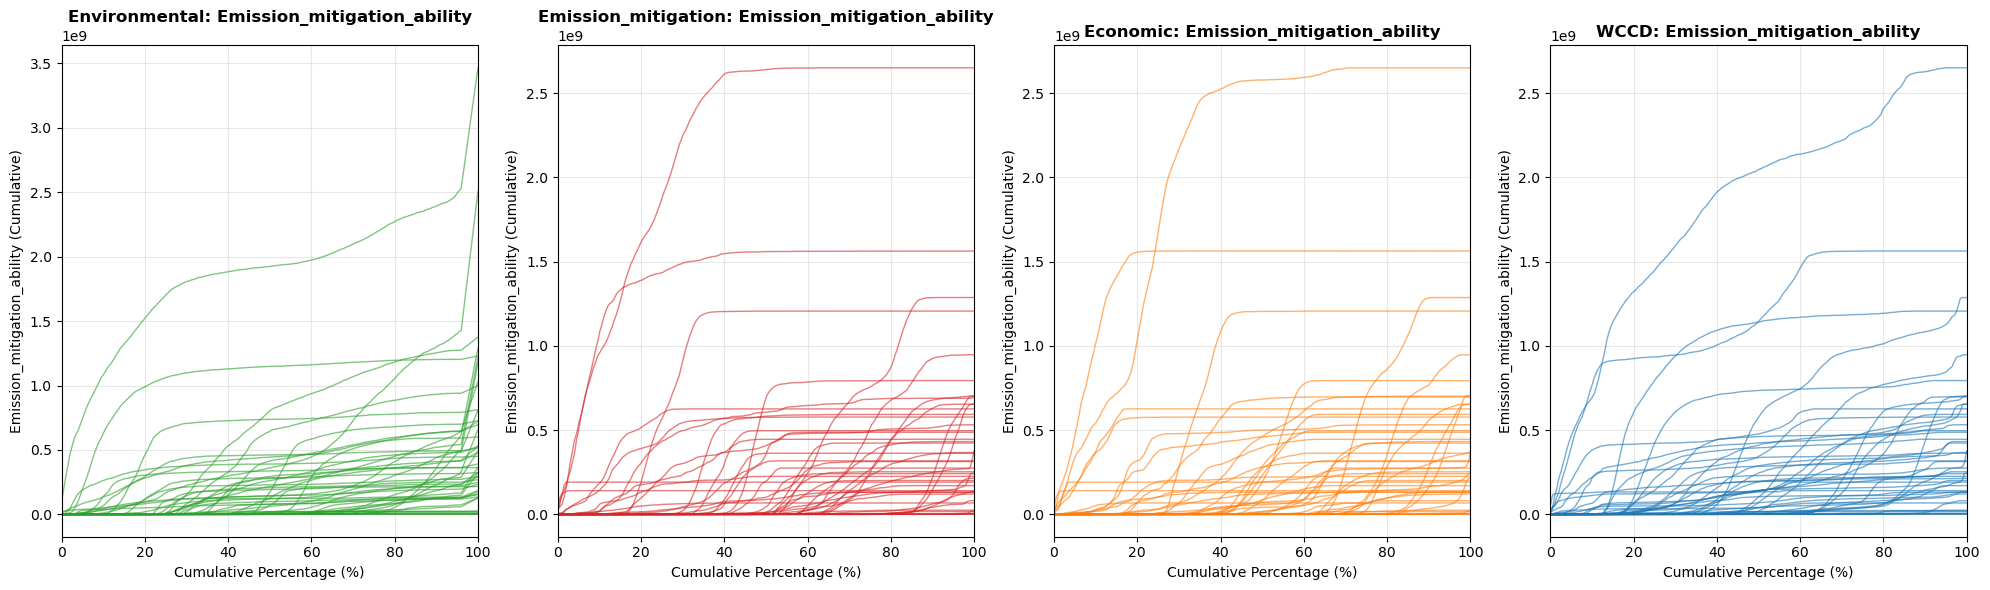

已保存: data/US_data/US_analysis_reslut/state_cumulative_curves_avg_npv_simplified.png


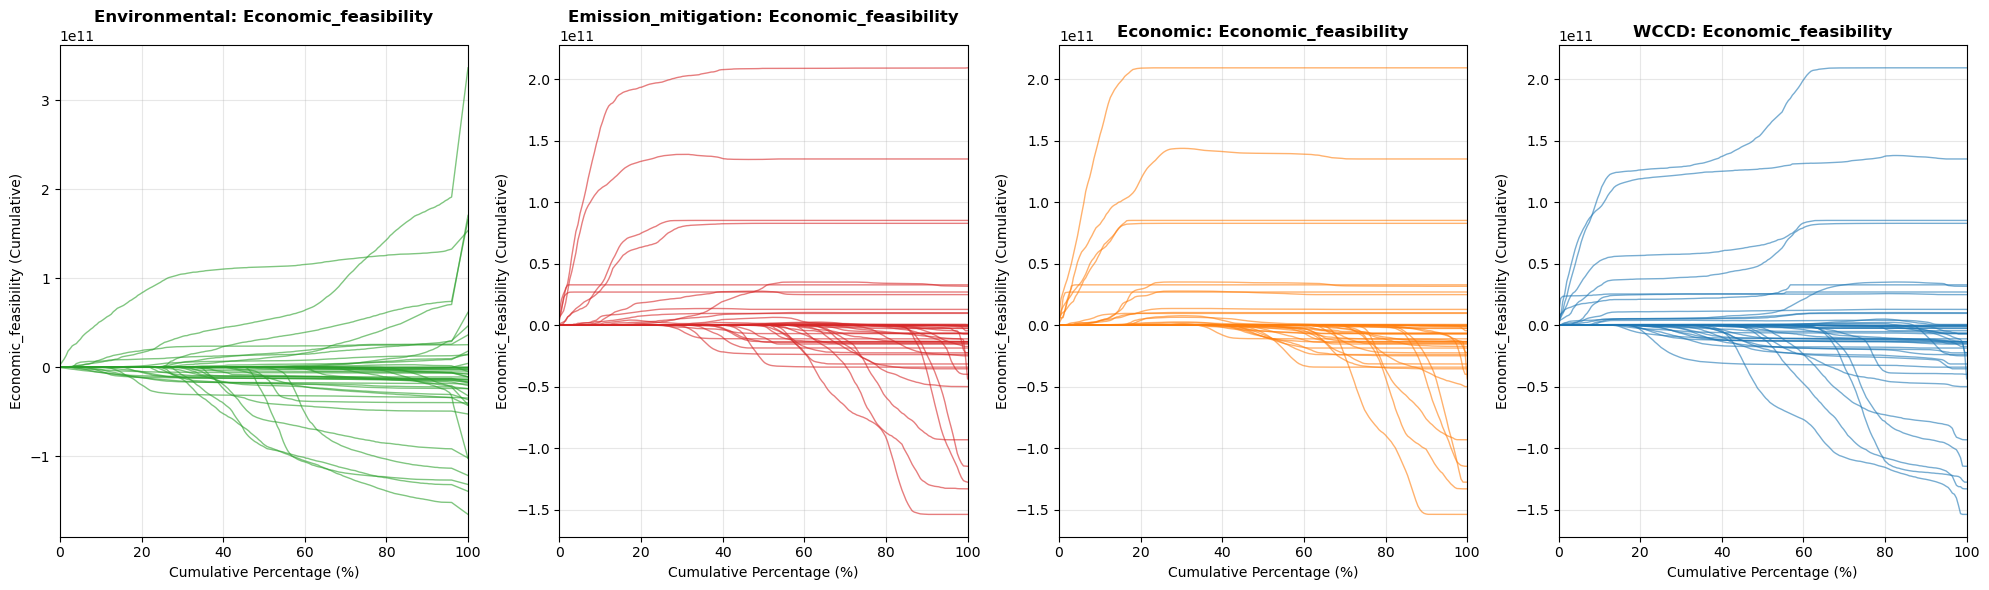


=== 州级别累积积分统计完成 ===
总州数: 48
总记录数: 192
每个州有 4 种排序方案

前10个州的WCCD方案结果:
 State_name  Environmental_sustainability  Emission_mitigation_ability  Economic_feasibility
    Alabama                  63375.564043                 3.237603e+08         -4.857993e+09
    Arizona                  17500.672169                 1.525581e+08          2.624102e+10
   Arkansas                  42205.665313                 2.086627e+08         -9.232186e+09
 California                 131610.598532                 1.176536e+09          1.598082e+11
   Colorado                  63229.339990                 4.950426e+08          6.783992e+10
Connecticut                    248.933724                 1.090621e+06         -1.535457e+08
   Delaware                  16055.502330                 7.724699e+07         -3.424821e+09
    Florida                  26369.712201                 2.142394e+08          1.192068e+09
    Georgia                 177949.655108                 9.084424e+08         -8.549310e+09
 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
def calculate_state_integration_analysis_simplified(pixel_optimized_data, us_states_4326, df_net_benefit, 
                                                   plot_curves=True, output_dir='data/US_data/US_analysis_reslut'):
    """
    简化版：生成更简洁的州级积分统计结果
    """
    print("=== 开始州级别累积积分统计分析（简化版）===")
    
    # 1. 定义三个维度和四种排序方案
    variables = [
        ('predicted_prob', 'Environmental_sustainability'),
        ('Expectation_net_benefit', 'Emission_mitigation_ability'), 
        ('avg_npv', 'Economic_feasibility')
    ]
    
    solution_types = ['Environmental', 'Emission_mitigation', 'Economic', 'WCCD']
    
    # 2. 数据预处理
    print("正在合并数据...")
    area_data = df_net_benefit[['lat', 'lon', 'area_m2']].copy()
    merged_data = pixel_optimized_data.merge(area_data, on=['lat', 'lon'], how='inner')
    area_values = merged_data['area_m2'].values / 10000
    
    # 3. 创建几何列，添加州标签
    print("正在添加州标签...")
    geometry = [Point(xy) for xy in zip(merged_data['lon'], merged_data['lat'])]
    pixel_gdf = gpd.GeoDataFrame(merged_data, geometry=geometry, crs='EPSG:4326')
    pixel_with_states = gpd.sjoin(pixel_gdf, us_states_4326, how='left', predicate='within')
    data_with_states = pixel_with_states.drop(columns=['geometry']).copy()
    
    # 4. 辅助函数
    def percentage_to_01(percentage_array):
        return percentage_array / 100.0
    
    def calculate_integral(x, y):
        """使用梯形法则计算积分"""
        if len(x) < 2:
            return 0.0
        if x[0] > x[-1]:
            x = x[::-1]
            y = y[::-1]
        integral = 0.0
        for i in range(len(x) - 1):
            dx = x[i+1] - x[i]
            avg_y = (y[i] + y[i+1]) / 2.0
            integral += avg_y * dx
        return integral
    
    # 5. 获取所有州列表
    all_states = data_with_states['NAME'].dropna().unique()
    print(f"发现 {len(all_states)} 个州")
    
    # 6. 存储结果 - 简化结构
    results = []
    state_curves_data = {}
    
    # 7. 对每个排序方案计算总体排序和州级曲线
    for solution_type in solution_types:
        print(f"正在处理排序方案: {solution_type}")
        
        # 7.1 确定总体排序依据
        if solution_type == 'WCCD':
            sort_values = merged_data['ccd_optimized'].values
        elif solution_type == 'Environmental':
            sort_values = merged_data['predicted_prob'].values* area_values
        elif solution_type == 'Emission_mitigation':
            sort_values = merged_data['Expectation_net_benefit'].values * area_values
        elif solution_type == 'Economic':
            sort_values = merged_data['avg_npv'].values * area_values
        
        # 7.2 创建总体精细分位数区间
        fine_percentiles = np.arange(100, -0.5, -0.5)
        fine_bins = np.percentile(sort_values, fine_percentiles)
        
        # 7.3 对每个维度计算州级累积曲线
        solution_curves = {}
        state_integrals = {}  # 存储每个州在该排序方案下的所有维度积分
        
        for var_name, var_label in variables:
            print(f"  处理维度: {var_label}")
            
            # 计算该维度的总效益值
            if var_name == 'predicted_prob':
                benefit_total_values = merged_data[var_name].values * area_values
            else:
                benefit_total_values = merged_data[var_name].values * area_values
            
            # 存储各州的累积曲线数据
            state_cumulative_data = {}
            
            # 7.4 对每个州计算累积曲线
            for state_name in all_states:
                state_mask = data_with_states['NAME'] == state_name
                state_data = data_with_states[state_mask]
                
                if len(state_data) == 0:
                    continue
                
                # 获取该州的数据
                state_indices = state_data.index
                state_benefit_values = benefit_total_values[state_indices]
                state_sort_values = sort_values[state_indices]
                
                # 按照总体精细分位数区间来划分该州的数据
                state_cumulative_benefits = []
                
                for i in range(len(fine_bins) - 1):
                    mask = (state_sort_values <= fine_bins[i]) & (state_sort_values >= fine_bins[i + 1])
                    if np.any(mask):
                        cumulative_benefit = np.sum(state_benefit_values[mask])
                        state_cumulative_benefits.append(cumulative_benefit)
                    else:
                        state_cumulative_benefits.append(0)
                
                # 计算累积曲线
                state_cumulative_benefits = np.array(state_cumulative_benefits)
                state_cumulative_sum = np.cumsum(state_cumulative_benefits)
                state_cumulative_percentage = np.arange(len(state_cumulative_sum)) / (len(state_cumulative_sum) - 1) * 100
                
                # 计算积分
                x_01 = percentage_to_01(state_cumulative_percentage)
                integral_value = calculate_integral(x_01, state_cumulative_sum)
                
                # 存储积分值
                if state_name not in state_integrals:
                    state_integrals[state_name] = {}
                state_integrals[state_name][var_label] = integral_value
                
                # 存储州级数据
                state_cumulative_data[state_name] = {
                    'cumulative_sum': state_cumulative_sum,
                    'cumulative_percentage': state_cumulative_percentage,
                    'data_count': len(state_data)
                }
            
            # 存储该维度的州级曲线数据
            solution_curves[var_label] = state_cumulative_data
        
        # 7.5 生成该排序方案的结果行（每个州一行）
        for state_name in all_states:
            if state_name in state_integrals:
                result_row = {
                    'State_name': state_name,
                    'Solution_Type': solution_type,
                    'Environmental_sustainability': state_integrals[state_name].get('Environmental_sustainability', 0),
                    'Emission_mitigation_ability': state_integrals[state_name].get('Emission_mitigation_ability', 0),
                    'Economic_feasibility': state_integrals[state_name].get('Economic_feasibility', 0)
                }
                results.append(result_row)
        
        # 存储该排序方案的曲线数据
        state_curves_data[solution_type] = solution_curves
    
    # 8. 创建结果DataFrame
    results_df = pd.DataFrame(results)
    
    # 9. 数据清理和格式化
    print("正在格式化结果...")
    results_df = results_df.sort_values(['State_name', 'Solution_Type']).reset_index(drop=True)
    
    # 数值格式化
    numeric_columns = ['Environmental_sustainability', 'Emission_mitigation_ability', 'Economic_feasibility']
    for col in numeric_columns:
        results_df[col] = results_df[col].round(6)
    
    # 10. 绘制各州累积曲线（如果启用）
    if plot_curves:
        print("正在绘制各州累积曲线...")
        create_state_cumulative_curves_simplified(state_curves_data, variables, solution_types, output_dir)
    
    # 11. 输出摘要
    print(f"\n=== 州级别累积积分统计完成 ===")
    print(f"总州数: {len(all_states)}")
    print(f"总记录数: {len(results_df)}")
    print(f"每个州有 {len(solution_types)} 种排序方案")
    
    # 显示前10个州的WCCD方案结果
    wccd_results = results_df[results_df['Solution_Type'] == 'WCCD'].head(10)
    print(f"\n前10个州的WCCD方案结果:")
    print(wccd_results[['State_name', 'Environmental_sustainability', 
                       'Emission_mitigation_ability', 'Economic_feasibility']].to_string(index=False))
    
    return results_df, state_curves_data

def create_state_cumulative_curves_simplified(state_curves_data, variables, solution_types, output_dir):
    """
    简化版：绘制各州累积曲线
    """
    import os
    os.makedirs(output_dir, exist_ok=True)
    
    # 定义颜色方案
    solution_colors = {
        'WCCD': '#1f77b4',      # 深蓝色
        'Environmental': '#2ca02c',  # 深绿色
        'Emission_mitigation': '#d62728',  # 深红色
        'Economic': '#ff7f0e'   # 橙色
    }
    
    # 为每个维度创建子图
    for var_idx, (var_name, var_label) in enumerate(variables):
        fig, axes = plt.subplots(1, len(solution_types), figsize=(20, 6))
        if len(solution_types) == 1:
            axes = [axes]
        
        for sol_idx, solution_type in enumerate(solution_types):
            ax = axes[sol_idx]
            
            # 获取该排序方案下该维度的州级数据
            if solution_type in state_curves_data and var_label in state_curves_data[solution_type]:
                state_data = state_curves_data[solution_type][var_label]
                
                # 绘制各州累积曲线
                for state_name, data in state_data.items():
                    cumulative_sum = data['cumulative_sum']
                    cumulative_percentage = data['cumulative_percentage']
                    
                    # 全量绘制
                    ax.plot(cumulative_percentage, cumulative_sum,
                           color=solution_colors[solution_type], 
                           linewidth=1.0, alpha=0.6)
            
            # 设置图形属性
            ax.set_xlim(0, 100)
            ax.set_xlabel('Cumulative Percentage (%)', fontsize=10)
            ax.set_ylabel(f'{var_label} (Cumulative)', fontsize=10)
            ax.set_title(f'{solution_type}: {var_label}', fontsize=12, fontweight='bold')
            ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        
        # 保存图片
        output_path = f'{output_dir}/state_cumulative_curves_{var_name}_simplified.png'
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"已保存: {output_path}")
        
        plt.show()

# 使用示例
if __name__ == "__main__":
    state_integration_results, state_curves_data = calculate_state_integration_analysis_simplified(
        df_pixel_optimized_data, 
        us_states_4326, 
        df_net_benefit,
        plot_curves=True
    )
    
    # 保存结果
    output_path = 'data/US_data/US_analysis_reslut/state_integration_analysis_simplified.csv'
    state_integration_results.to_csv(output_path, index=False)
    print(f"\n结果已保存到: {output_path}")
    
    # 显示结果摘要
    print(f"\n=== 结果摘要 ===")
    print(f"各排序方案的平均积分:")
    summary = state_integration_results.groupby('Solution_Type')[['Environmental_sustainability', 
                                                                'Emission_mitigation_ability', 
                                                                'Economic_feasibility']].mean()
    print(summary.round(6))

In [15]:
state_integration_results

State_name        Solution_Type  Environmental_sustainability  \
0      Alabama             Economic                  51896.015129   
1      Alabama  Emission_mitigation                  60509.529567   
2      Alabama        Environmental                  72863.067697   
3      Alabama                 WCCD                  63375.564043   
4      Arizona             Economic                  18047.955218   
..         ...                  ...                           ...   
187  Wisconsin                 WCCD                  31600.965478   
188    Wyoming             Economic                   9791.164464   
189    Wyoming  Emission_mitigation                   7333.318297   
190    Wyoming        Environmental                   3792.690722   
191    Wyoming                 WCCD                   8652.938401   

     Emission_mitigation_ability  Economic_feasibility  
0                   2.777177e+08         -3.620679e+09  
1                   3.233023e+08         -4.318472e+09  
2                   3.708222e+08         -5.705416e+09  
3                   3.237603e+08         -4.857993e+09  
4                   1.878682e+08          3.225057e+10  
..                           ...                   ...  
187                 1.406346e+08         -2.465616e+10  
188                 1.083090e+08          8.945521e+09  
189                 7.973799e+07          7.204839e+09  
190                 3.360089e+07          2.779091e+09  
191                 7.846916e+07          7.300248e+09  

[192 rows x 5 columns]

## 1.5 Policy efficiency 

calculate the mean improvement of WDDC solution 

what is the mean improvement of policy?

definition: the integral of priority order

对于每个州，计算WCCD方案所能带来的提升

最后输出一个dataframe，含有6个column:

包含State_name, 3个column记录WCCD的平均提升，平均提升的均值、均值标准误差

=== 开始计算各州CCD方案性能提升并合并到现有数据 ===
正在读取现有州级分析数据...
现有数据形状: (48, 15)
现有数据列: ['State_name', 'abandoned_land_ha', 'Environmental_suitability_per_ha', 'Emission_mitigation_per_ha', 'Economic_NPV_per_ha', 'Power_generation_per_ha', 'CCD_Mean', 'Environmental_improvement_mean', 'Emission_improvement_mean', 'Economic_improvement_mean', 'Environmental_improvement_std', 'Emission_improvement_std', 'Economic_improvement_std', 'Overall_improvement_mean', 'Overall_improvement_std']
发现已存在的WCCD列: ['Environmental_improvement_mean', 'Emission_improvement_mean', 'Economic_improvement_mean', 'Environmental_improvement_std', 'Emission_improvement_std', 'Economic_improvement_std', 'Overall_improvement_mean', 'Overall_improvement_std']
将覆盖这些列...
删除WCCD列后数据形状: (48, 7)

正在处理州: Alabama
  处理维度: Environmental_sustainability
    CCD vs Environmental: -13.02%
    CCD vs Emission_mitigation: +4.74%
    CCD vs Economic: +22.12%
    平均提升: +4.61% ± 10.14%
  处理维度: Emission_mitigation_ability
    CCD vs Environmental: -12

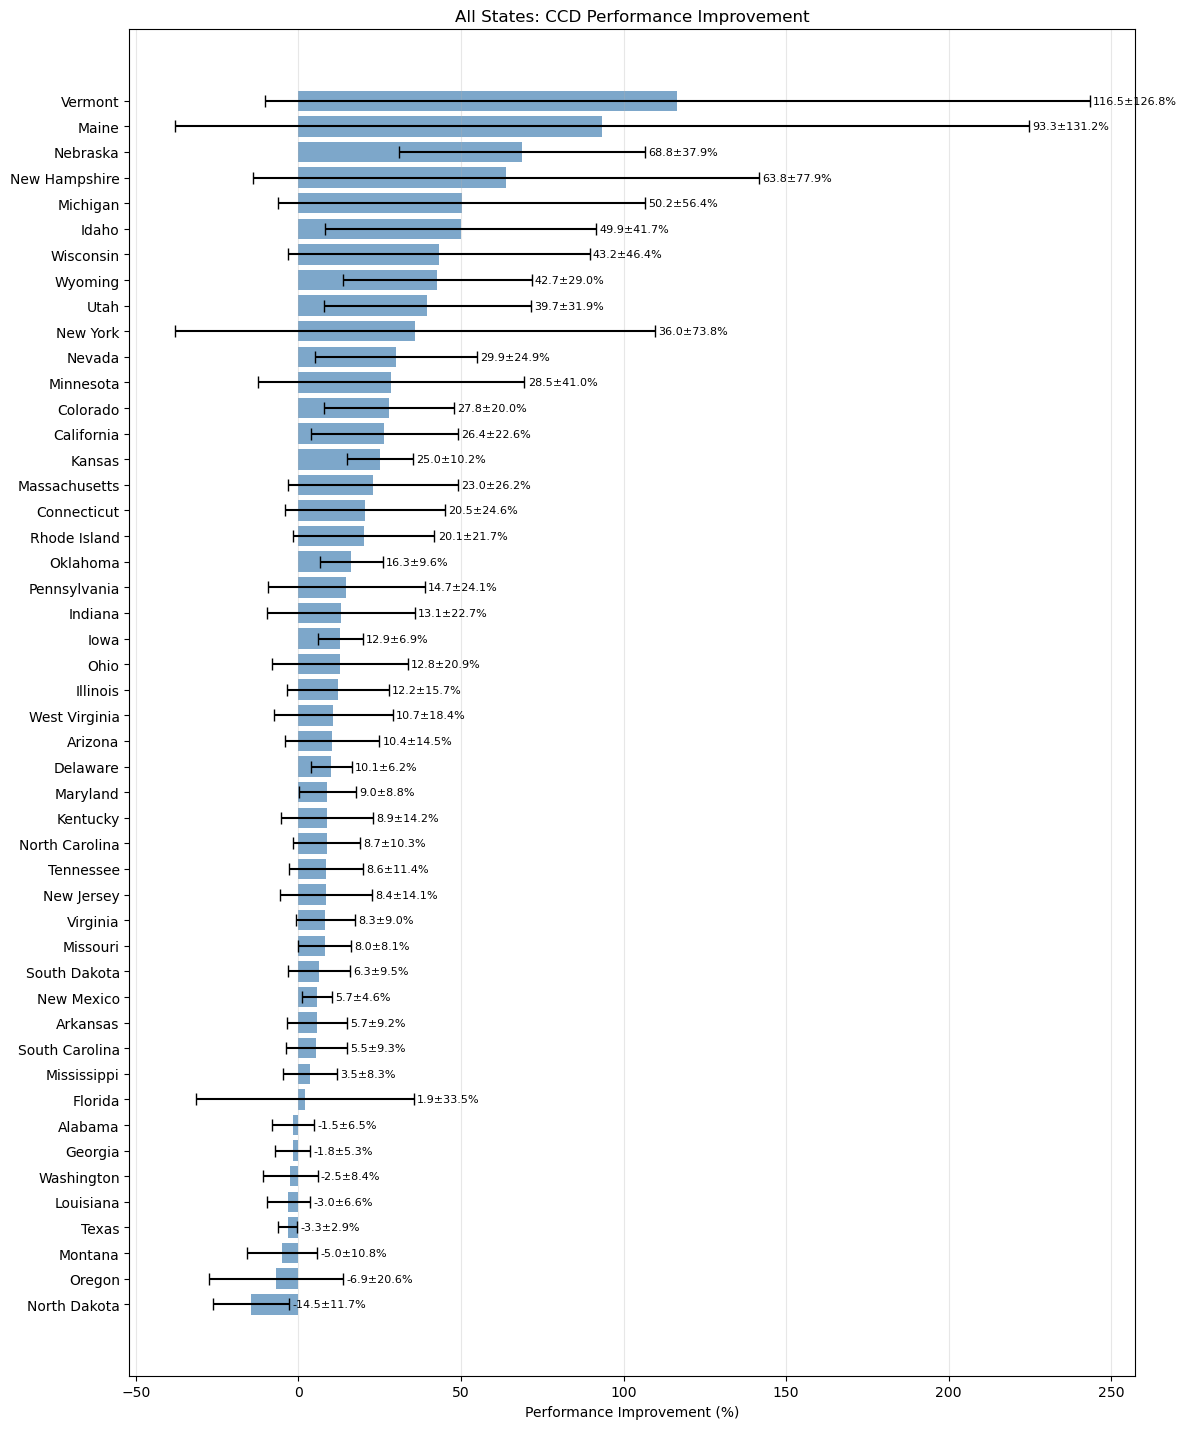

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def calculate_state_ccd_performance_improvement_and_merge(csv_path, state_analysis_path='data/US_data/state_level_analysis.csv', output_dir='data/US_data/US_analysis_reslut'):
    """
    计算各州CCD方案的性能提升，并合并到现有的state_level_analysis.csv中
    
    参数:
    - csv_path: 州级积分分析结果CSV文件路径
    - state_analysis_path: 现有州级分析CSV文件路径
    - output_dir: 输出目录
    
    返回:
    - 合并后的DataFrame
    """
    print("=== 开始计算各州CCD方案性能提升并合并到现有数据 ===")
    
    # 1. 读取现有州级分析数据
    print("正在读取现有州级分析数据...")
    try:
        state_analysis_df = pd.read_csv(state_analysis_path)
        print(f"现有数据形状: {state_analysis_df.shape}")
        print(f"现有数据列: {list(state_analysis_df.columns)}")
        
        # 检查是否已经包含WCCD列
        wccd_columns = ['Environmental_improvement_mean', 'Emission_improvement_mean', 'Economic_improvement_mean',
                       'Environmental_improvement_std', 'Emission_improvement_std', 'Economic_improvement_std',
                       'Overall_improvement_mean', 'Overall_improvement_std']
        
        existing_wccd_columns = [col for col in wccd_columns if col in state_analysis_df.columns]
        if existing_wccd_columns:
            print(f"发现已存在的WCCD列: {existing_wccd_columns}")
            print("将覆盖这些列...")
            # 删除已存在的WCCD列
            state_analysis_df = state_analysis_df.drop(columns=existing_wccd_columns)
            print(f"删除WCCD列后数据形状: {state_analysis_df.shape}")
        
    except FileNotFoundError:
        print(f"错误: 找不到文件 {state_analysis_path}")
        return None, None, None
    
    # 2. 读取积分分析数据
    try:
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        return None, None, None
    
    # 3. 定义三个维度
    dimensions = ['Environmental_sustainability', 'Emission_mitigation_ability', 'Economic_feasibility']
    
    # 4. 计算各州CCD性能提升
    state_performance_results = {}
    
    for state_name in df['State_name'].unique():
        print(f"\n正在处理州: {state_name}")
        
        # 获取该州的数据
        state_data = df[df['State_name'] == state_name].copy()
        
        if len(state_data) != 4:  # 应该有4种排序方案
            print(f"  警告: {state_name} 数据不完整，跳过")
            continue
        
        # 计算该州CCD相对于其他方案的性能提升
        state_improvements = {}
        state_std_errors = {}
        
        for dimension in dimensions:
            print(f"  处理维度: {dimension}")
            
            # 获取CCD和其他方案的值
            ccd_value = state_data[state_data['Solution_Type'] == 'WCCD'][dimension].iloc[0]
            other_values = {}
            
            for solution_type in ['Environmental', 'Emission_mitigation', 'Economic']:
                if solution_type in state_data['Solution_Type'].values:
                    other_values[solution_type] = state_data[state_data['Solution_Type'] == solution_type][dimension].iloc[0]
            
            # 计算性能提升
            improvements = []
            for other_name, other_value in other_values.items():
                if other_value != 0:
                    improvement = (ccd_value - other_value) / abs(other_value) * 100
                    improvements.append(improvement)
                    print(f"    CCD vs {other_name}: {improvement:+.2f}%")
                else:
                    print(f"    CCD vs {other_name}: 无法计算（分母为0）")
            
            if improvements:
                # 计算平均提升和标准误
                mean_improvement = np.mean(improvements)  
                std_improvement = np.std(improvements, ddof=1)
                std_error = std_improvement / np.sqrt(len(improvements))
                
                state_improvements[dimension] = mean_improvement
                state_std_errors[dimension] = std_error
                
                print(f"    平均提升: {mean_improvement:+.2f}% ± {std_error:.2f}%")
            else:
                state_improvements[dimension] = 0
                state_std_errors[dimension] = 0
                print(f"    无法计算性能提升")
        
        # 存储该州的结果
        state_performance_results[state_name] = {
            'improvements': state_improvements,
            'std_errors': state_std_errors
        }
    
    # 5. 计算各州总体性能提升（考虑误差传播）
    print(f"\n=== 计算各州总体性能提升（考虑误差传播）===")
    
    state_overall_results = {}
    
    for state_name, state_data in state_performance_results.items():
        print(f"\n处理州: {state_name}")
        
        # 收集有效数据
        valid_data = []
        for dimension in dimensions:
            if state_data['improvements'][dimension] != 0:
                valid_data.append({
                    'dimension': dimension,
                    'improvement': state_data['improvements'][dimension],
                    'std_error': state_data['std_errors'][dimension]
                })
        
        if not valid_data:
            print(f"  没有有效的性能提升数据")
            state_overall_results[state_name] = None
            continue
        
        # 使用误差传播理论计算总体性能提升
        n_dimensions = len(valid_data)
        overall_mean = np.mean([data['improvement'] for data in valid_data])
        
        # 误差传播公式: σ_total = sqrt(Σ(σ_i²) / n²)
        squared_std_errors = [data['std_error']**2 for data in valid_data]
        overall_variance = np.sum(squared_std_errors) / (n_dimensions**2)
        overall_std_error = np.sqrt(overall_variance)
        
        # 计算95%置信区间
        overall_ci_95 = 1.96 * overall_std_error
        overall_cv = (overall_std_error / abs(overall_mean) * 100) if overall_mean != 0 else 0
        
        print(f"  维度数量: {n_dimensions}")
        print("  各维度标准误:", [f"{data['std_error']:.4f}" for data in valid_data])
        print(f"  总体均值: {overall_mean:+.2f}%")
        print(f"  总体标准误: ±{overall_std_error:.2f}%")
        print(f"  95%置信区间: [{overall_mean - overall_ci_95:.2f}%, {overall_mean + overall_ci_95:.2f}%]")
        print(f"  变异系数: {overall_cv:.2f}%")
        
        state_overall_results[state_name] = {
            'overall_mean': overall_mean,
            'overall_std_error': overall_std_error,
            'overall_ci_95': overall_ci_95,
            'overall_cv': overall_cv,
            'n_dimensions': n_dimensions,
            'dimension_details': valid_data
        }
    
    # 6. 创建WCCD性能提升数据（9个列）
    print(f"\n=== 创建WCCD性能提升数据（9个列）===")
    
    wccd_data = []
    for state_name, result in state_overall_results.items():
        if result is not None:
            wccd_data.append({
                'State_name': state_name,
                # 各维度性能提升均值
                'Environmental_improvement_mean': state_performance_results[state_name]['improvements']['Environmental_sustainability'],
                'Emission_improvement_mean': state_performance_results[state_name]['improvements']['Emission_mitigation_ability'],
                'Economic_improvement_mean': state_performance_results[state_name]['improvements']['Economic_feasibility'],
                # 各维度标准误
                'Environmental_improvement_std': state_performance_results[state_name]['std_errors']['Environmental_sustainability'],
                'Emission_improvement_std': state_performance_results[state_name]['std_errors']['Emission_mitigation_ability'],
                'Economic_improvement_std': state_performance_results[state_name]['std_errors']['Economic_feasibility'],
                # 总体性能提升
                'Overall_improvement_mean': result['overall_mean'],
                'Overall_improvement_std': result['overall_std_error']
            })
    
    wccd_df = pd.DataFrame(wccd_data)
    

    # 7. 合并到现有数据
    print(f"\n=== 合并数据到现有state_level_analysis.csv ===")
    # 使用State_name进行左连接
    merged_df = state_analysis_df.merge(wccd_df, on='State_name', how='left')
 
    # 8. 保存合并后的数据
    os.makedirs(output_dir, exist_ok=True)
    
    # 保存合并后的数据
    merged_path = f'{output_dir}/state_level_analysis_with_wccd.csv'
    merged_df.to_csv(merged_path, index=False)
    print(f"合并后数据已保存到: {merged_path}")
    
    # 备份原文件并更新
    backup_path = f'{state_analysis_path}.backup'
    state_analysis_df.to_csv(backup_path, index=False)
    print(f"原文件已备份到: {backup_path}")
    
    # 更新原文件
    merged_df.to_csv(state_analysis_path, index=False)
    print(f"原文件已更新: {state_analysis_path}")
    
    # 9. 输出前10个州的结果
    if 'Overall_improvement_mean' in merged_df.columns:
        print(f"\n=== 前10个州WCCD性能提升结果 ===")
        top_10 = merged_df[merged_df['Overall_improvement_mean'].notna()].nlargest(10, 'Overall_improvement_mean')
        print(top_10[['State_name', 'Environmental_improvement_mean', 'Emission_improvement_mean', 
                      'Economic_improvement_mean', 'Overall_improvement_mean', 'Overall_improvement_std']].to_string(index=False))
    else:
        print("无法显示前10个州结果，因为缺少Overall_improvement_mean列")
    
    # 10. 绘制性能提升分布图
    if 'Overall_improvement_mean' in merged_df.columns:
        create_performance_visualization(merged_df, output_dir)
    else:
        print("跳过可视化，因为缺少必要的列")
    
    return merged_df, state_performance_results, state_overall_results

def create_performance_visualization(merged_df, output_dir):
    """
    仅绘制所有州的性能提升条形图
    """
    print(f"\n正在创建所有州性能提升条形图...")

    valid_data = merged_df[merged_df['Overall_improvement_mean'].notna()]

    # 按性能提升排序
    valid_data = valid_data.sort_values('Overall_improvement_mean', ascending=True).reset_index(drop=True)
    y_pos = np.arange(len(valid_data))

    fig, ax = plt.subplots(figsize=(12, max(8, len(valid_data) * 0.3)))
    bars = ax.barh(
        y_pos, 
        valid_data['Overall_improvement_mean'], 
        xerr=valid_data['Overall_improvement_std'], 
        capsize=4, alpha=0.7, color='steelblue'
    )

    ax.set_yticks(y_pos)
    ax.set_yticklabels(valid_data['State_name'])
    ax.set_xlabel('Performance Improvement (%)')
    ax.set_title('All States: CCD Performance Improvement')
    ax.grid(True, alpha=0.3, axis='x')

    # 添加数值标签
    for i, (mean, std) in enumerate(zip(valid_data['Overall_improvement_mean'], valid_data['Overall_improvement_std'])):
        ax.text(mean + (std if not np.isnan(std) else 0) + 1, i, f'{mean:.1f}±{std:.1f}%', va='center', fontsize=8)

    plt.tight_layout()
    bar_path = f'{output_dir}/state_level_analysis_with_wccd_all_states.png'
    plt.savefig(bar_path, dpi=300, bbox_inches='tight')
    print(f"所有州性能提升条形图已保存到: {bar_path}")
    plt.show()

# 使用示例
if __name__ == "__main__":
    # 计算各州CCD性能提升并合并到现有数据
    csv_path = 'data/US_data/US_analysis_reslut/state_integration_analysis_simplified.csv'
    state_analysis_path = 'data/US_data/US_analysis_reslut/state_level_analysis.csv'
    
    merged_df, state_performance_results, state_overall_results = calculate_state_ccd_performance_improvement_and_merge(
        csv_path, 
        state_analysis_path,
        output_dir='data/US_data/US_analysis_reslut'
    )
    

## 1.6 P-value for veritfy

=== 开始CCD方案显著性分析 ===
有效州数: 48

Environmental 维度:
  平均提升: +49.22% ± 11.82%
  中位数: +27.41%
  四分位数: [+15.65%, +45.66%]
  t统计量: 4.164
  p值: 0.000132
  显著性: ***
  Cohen's d: 0.601
  95%置信区间: [+26.05%, +72.39%]

Emission Mitigation 维度:
  平均提升: +40.31% ± 11.79%
  中位数: +19.65%
  四分位数: [+8.95%, +38.23%]
  t统计量: 3.419
  p值: 0.001309
  显著性: **
  Cohen's d: 0.493
  95%置信区间: [+17.20%, +63.43%]

Economic Feasibility 维度:
  平均提升: -29.00% ± 14.93%
  中位数: -14.99%
  四分位数: [-32.09%, +19.92%]
  t统计量: -1.942
  p值: 0.058085
  显著性: ns
  Cohen's d: -0.280
  95%置信区间: [-58.26%, +0.26%]

总体性能提升:
  平均提升: +20.18% ± 25.56%
  中位数: +11.47%
  t统计量: 5.470
  p值: 0.000002
  显著性: ***
  Cohen's d: 0.790
  95%置信区间: [+12.95%, +27.41%]

=== 维度间比较分析 ===

Environmental vs Emission:
  平均差异: +8.91%
  t统计量: 7.208
  p值: 0.000000
  显著性: ***
  Cohen's d: 1.040

Environmental vs Economic:
  平均差异: +78.22%
  t统计量: 2.977
  p值: 0.004593
  显著性: **
  Cohen's d: 0.430

Emission vs Economic:
  平均差异: +69.31%
  t统计量: 2.638
  p值: 0.011275
  显著性: 

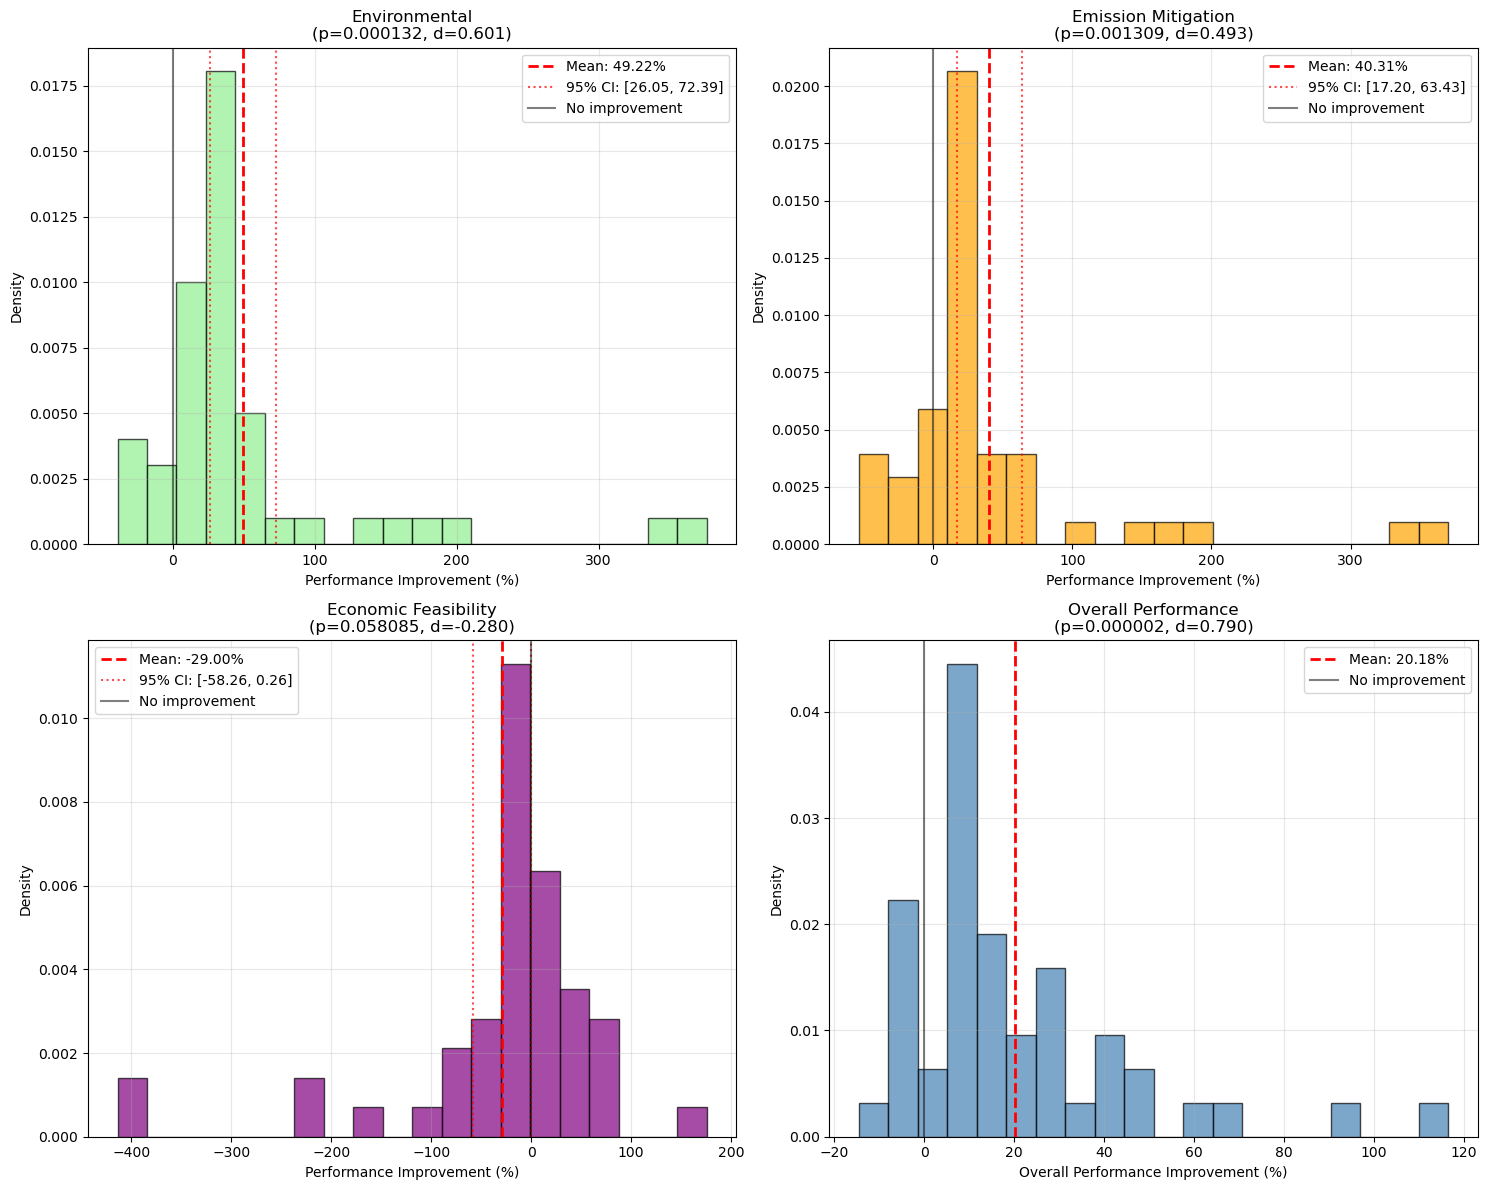

显著性对比图已保存到: data/US_data/US_analysis_reslut/ccd_significance_comparison.png


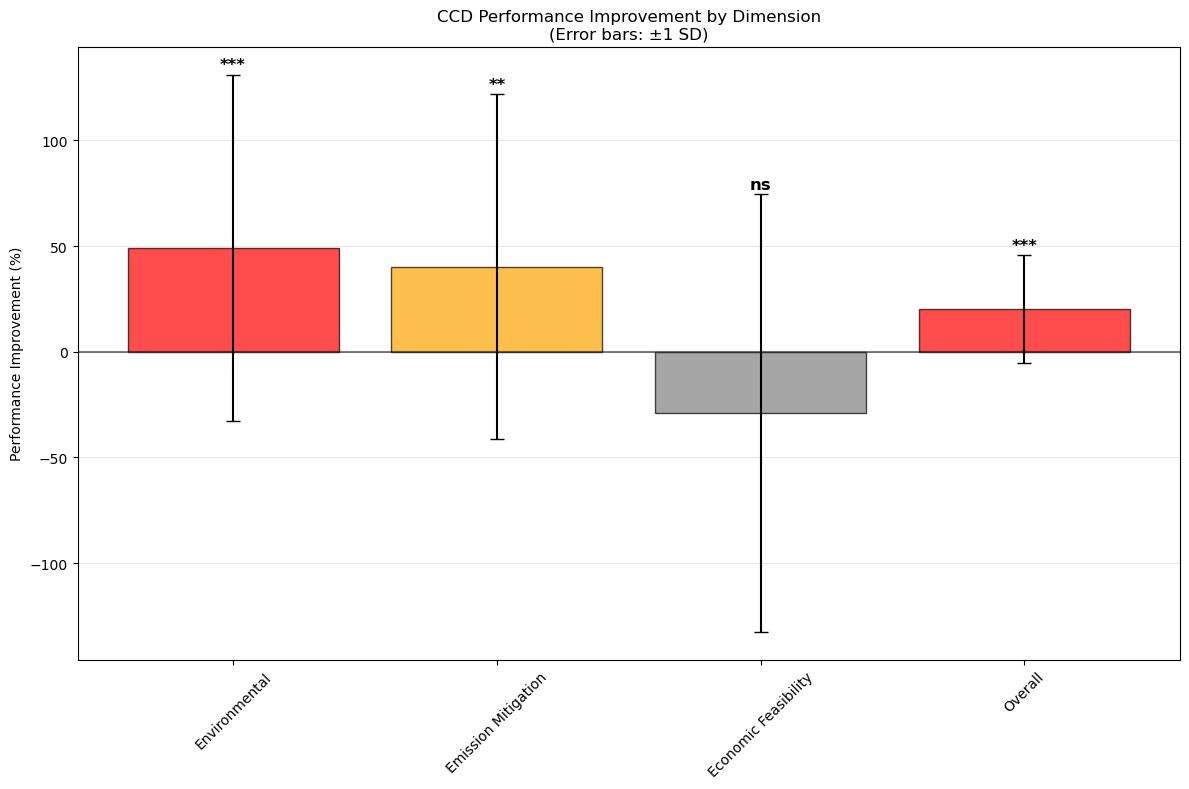

效应量对比图已保存到: data/US_data/US_analysis_reslut/ccd_effect_size_comparison.png


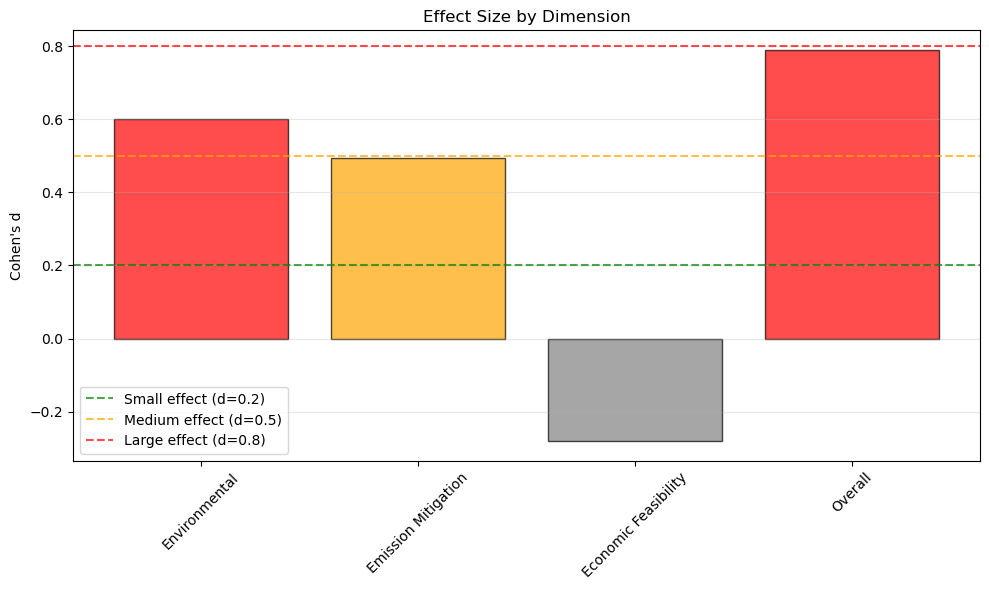

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os 
def calculate_ccd_significance_analysis(merged_df, output_dir='data/US_data/US_analysis_reslut'):
    """
    计算CCD方案在各州的平均提升和显著性水平
    
    参数:
    - merged_df: 包含WCCD性能提升数据的DataFrame
    - output_dir: 输出目录
    
    返回:
    - 显著性分析结果
    """
    print("=== 开始CCD方案显著性分析 ===")
    
    # 过滤有效数据
    valid_data = merged_df[merged_df['Overall_improvement_mean'].notna()].copy()
    
    if len(valid_data) == 0:
        print("没有有效的性能提升数据")
        return None
    
    print(f"有效州数: {len(valid_data)}")
    
    # 1. 计算各维度的平均提升和统计量
    dimensions = ['Environmental_improvement_mean', 'Emission_improvement_mean', 'Economic_improvement_mean']
    dimension_labels = ['Environmental', 'Emission Mitigation', 'Economic Feasibility']
    
    dimension_stats = {}
    
    for dim, label in zip(dimensions, dimension_labels):
        values = valid_data[dim].values
        std_values = valid_data[dim.replace('_mean', '_std')].values
        
        # 基本统计量
        mean_val = np.mean(values)
        std_val = np.std(values, ddof=1)
        median_val = np.median(values)
        q25 = np.percentile(values, 25)
        q75 = np.percentile(values, 75)
        
        
        # 单样本t检验 (检验是否显著大于0)
        t_stat, p_value = stats.ttest_1samp(values, 0)
        
        # 效应量 (Cohen's d)
        cohens_d = mean_val / std_val if std_val != 0 else 0
        
        # 置信区间
        n = len(values)
        se = std_val / np.sqrt(n)
        ci_95_lower = mean_val - 1.96 * se
        ci_95_upper = mean_val + 1.96 * se
        
        dimension_stats[dim] = {
            'label': label,
            'mean': mean_val,
            'std': std_val,
            'median': median_val,
            'q25': q25,
            'q75': q75,
            't_stat': t_stat,
            'p_value': p_value,
            'cohens_d': cohens_d,
            'ci_95_lower': ci_95_lower,
            'ci_95_upper': ci_95_upper,
            'n': n
        }
        
        print(f"\n{label} 维度:")
        print(f"  平均提升: {mean_val:+.2f}% ± {se:.2f}%")
        print(f"  中位数: {median_val:+.2f}%")
        print(f"  四分位数: [{q25:+.2f}%, {q75:+.2f}%]")
        print(f"  t统计量: {t_stat:.3f}")
        print(f"  p值: {p_value:.6f}")
        print(f"  显著性: {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'ns'}")
        print(f"  Cohen's d: {cohens_d:.3f}")
        print(f"  95%置信区间: [{ci_95_lower:+.2f}%, {ci_95_upper:+.2f}%]")
    
    # 2. 总体性能提升分析
    overall_values = valid_data['Overall_improvement_mean'].values
    overall_std_values = valid_data['Overall_improvement_std'].values
    
    overall_mean = np.mean(overall_values)
    overall_std = np.std(overall_values, ddof=1)
    overall_median = np.median(overall_values)
    
    # 单样本t检验
    overall_t_stat, overall_p_value = stats.ttest_1samp(overall_values, 0)
    overall_cohens_d = overall_mean / overall_std if overall_std != 0 else 0
    
    # 置信区间
    n = len(overall_values)
    overall_se = overall_std / np.sqrt(n)
    overall_ci_95_lower = overall_mean - 1.96 * overall_se
    overall_ci_95_upper = overall_mean + 1.96 * overall_se
    
    print(f"\n总体性能提升:")
    print(f"  平均提升: {overall_mean:+.2f}% ± {overall_std:.2f}%")
    print(f"  中位数: {overall_median:+.2f}%")
    print(f"  t统计量: {overall_t_stat:.3f}")
    print(f"  p值: {overall_p_value:.6f}")
    print(f"  显著性: {'***' if overall_p_value < 0.001 else '**' if overall_p_value < 0.01 else '*' if overall_p_value < 0.05 else 'ns'}")
    print(f"  Cohen's d: {overall_cohens_d:.3f}")
    print(f"  95%置信区间: [{overall_ci_95_lower:+.2f}%, {overall_ci_95_upper:+.2f}%]")
    
    # 3. 维度间比较分析
    print(f"\n=== 维度间比较分析 ===")
    
    # 配对t检验比较各维度
    dimension_pairs = [
        ('Environmental_improvement_mean', 'Emission_improvement_mean', 'Environmental vs Emission'),
        ('Environmental_improvement_mean', 'Economic_improvement_mean', 'Environmental vs Economic'),
        ('Emission_improvement_mean', 'Economic_improvement_mean', 'Emission vs Economic')
    ]
    
    pairwise_comparisons = {}
    
    for dim1, dim2, label in dimension_pairs:
        values1 = valid_data[dim1].values
        values2 = valid_data[dim2].values
        
        # 配对t检验
        t_stat, p_value = stats.ttest_rel(values1, values2)
        
        # 效应量 (配对Cohen's d)
        diff = values1 - values2
        cohens_d = np.mean(diff) / np.std(diff, ddof=1) if np.std(diff, ddof=1) != 0 else 0
        
        pairwise_comparisons[label] = {
            't_stat': t_stat,
            'p_value': p_value,
            'cohens_d': cohens_d,
            'mean_diff': np.mean(diff),
            'std_diff': np.std(diff, ddof=1)
        }
        
        print(f"\n{label}:")
        print(f"  平均差异: {np.mean(diff):+.2f}%")
        print(f"  t统计量: {t_stat:.3f}")
        print(f"  p值: {p_value:.6f}")
        print(f"  显著性: {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'ns'}")
        print(f"  Cohen's d: {cohens_d:.3f}")
    
    # 4. 创建结果汇总表
    results_summary = []
    
    # 各维度结果
    for dim, stats_dict in dimension_stats.items():
        results_summary.append({
            'Dimension': stats_dict['label'],
            'Mean_Improvement': stats_dict['mean'],
            'Std_Improvement': stats_dict['std'],
            'Median_Improvement': stats_dict['median'],
            'T_Statistic': stats_dict['t_stat'],
            'P_Value': stats_dict['p_value'],
            'Significance': '***' if stats_dict['p_value'] < 0.001 else '**' if stats_dict['p_value'] < 0.01 else '*' if stats_dict['p_value'] < 0.05 else 'ns',
            'Cohens_D': stats_dict['cohens_d'],
            'CI_95_Lower': stats_dict['ci_95_lower'],
            'CI_95_Upper': stats_dict['ci_95_upper'],
            'Sample_Size': stats_dict['n']
        })
    
    # 总体结果
    results_summary.append({
        'Dimension': 'Overall',
        'Mean_Improvement': overall_mean,
        'Std_Improvement': overall_std,
        'Median_Improvement': overall_median,
        'T_Statistic': overall_t_stat,
        'P_Value': overall_p_value,
        'Significance': '***' if overall_p_value < 0.001 else '**' if overall_p_value < 0.01 else '*' if overall_p_value < 0.05 else 'ns',
        'Cohens_D': overall_cohens_d,
        'CI_95_Lower': overall_ci_95_lower,
        'CI_95_Upper': overall_ci_95_upper,
        'Sample_Size': n
    })
    
    results_df = pd.DataFrame(results_summary)
    
    # 5. 保存结果
    os.makedirs(output_dir, exist_ok=True)
    
    # 保存显著性分析结果
    significance_path = f'{output_dir}/ccd_significance_analysis.csv'
    results_df.to_csv(significance_path, index=False)
    print(f"\n显著性分析结果已保存到: {significance_path}")
    
    # 6. 创建可视化图表
    create_significance_visualizations(valid_data, dimension_stats, overall_mean, overall_std, 
                                     overall_t_stat, overall_p_value, output_dir)
    
    return {
        'dimension_stats': dimension_stats,
        'overall_stats': {
            'mean': overall_mean,
            'std': overall_std,
            't_stat': overall_t_stat,
            'p_value': overall_p_value,
            'cohens_d': overall_cohens_d
        },
        'pairwise_comparisons': pairwise_comparisons,
        'results_df': results_df
    }

def create_significance_visualizations(valid_data, dimension_stats, overall_mean, overall_std, 
                                     overall_t_stat, overall_p_value, output_dir):
    """
    创建显著性分析可视化图表
    """
    print(f"\n正在创建显著性分析可视化图表...")
    
    # 1. 各维度性能提升分布图
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    dimensions = ['Environmental_improvement_mean', 'Emission_improvement_mean', 'Economic_improvement_mean']
    dimension_labels = ['Environmental', 'Emission Mitigation', 'Economic Feasibility']
    colors = ['lightgreen', 'orange', 'purple']
    
    # 各维度分布
    for i, (dim, label, color) in enumerate(zip(dimensions, dimension_labels, colors)):
        ax = axes[i//2, i%2]
        values = valid_data[dim].values
        
        # 直方图
        ax.hist(values, bins=20, alpha=0.7, color=color, edgecolor='black', density=True)
        
        # 添加均值和置信区间
        mean_val = dimension_stats[dim]['mean']
        ci_lower = dimension_stats[dim]['ci_95_lower']
        ci_upper = dimension_stats[dim]['ci_95_upper']
        
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}%')
        ax.axvline(ci_lower, color='red', linestyle=':', alpha=0.7, label=f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]')
        ax.axvline(ci_upper, color='red', linestyle=':', alpha=0.7)
        ax.axvline(0, color='black', linestyle='-', alpha=0.5, label='No improvement')
        
        ax.set_xlabel('Performance Improvement (%)')
        ax.set_ylabel('Density')
        ax.set_title(f'{label}\n(p={dimension_stats[dim]["p_value"]:.6f}, d={dimension_stats[dim]["cohens_d"]:.3f})')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    # 总体分布
    ax = axes[1, 1]
    overall_values = valid_data['Overall_improvement_mean'].values
    ax.hist(overall_values, bins=20, alpha=0.7, color='steelblue', edgecolor='black', density=True)
    
    ax.axvline(overall_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {overall_mean:.2f}%')
    ax.axvline(0, color='black', linestyle='-', alpha=0.5, label='No improvement')
    
    ax.set_xlabel('Overall Performance Improvement (%)')
    ax.set_ylabel('Density')
    ax.set_title(f'Overall Performance\n(p={overall_p_value:.6f}, d={overall_mean/overall_std:.3f})')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # 保存图表
    dist_path = f'{output_dir}/ccd_significance_distributions.png'
    plt.savefig(dist_path, dpi=300, bbox_inches='tight')
    print(f"分布图已保存到: {dist_path}")
    plt.show()
    
    # 2. 显著性水平对比图
    fig, ax = plt.subplots(figsize=(12, 8))
    
    dimensions = ['Environmental', 'Emission Mitigation', 'Economic Feasibility', 'Overall']
    means = [dimension_stats['Environmental_improvement_mean']['mean'],
             dimension_stats['Emission_improvement_mean']['mean'],
             dimension_stats['Economic_improvement_mean']['mean'],
             overall_mean]
    stds = [dimension_stats['Environmental_improvement_mean']['std'],
            dimension_stats['Emission_improvement_mean']['std'],
            dimension_stats['Economic_improvement_mean']['std'],
            overall_std]
    p_values = [dimension_stats['Environmental_improvement_mean']['p_value'],
                dimension_stats['Emission_improvement_mean']['p_value'],
                dimension_stats['Economic_improvement_mean']['p_value'],
                overall_p_value]
    
    # 颜色根据显著性水平
    colors = ['red' if p < 0.001 else 'orange' if p < 0.01 else 'yellow' if p < 0.05 else 'gray' for p in p_values]
    
    bars = ax.bar(dimensions, means, yerr=stds, capsize=5, color=colors, alpha=0.7, edgecolor='black')
    
    # 添加显著性标记
    for i, (bar, p_val) in enumerate(zip(bars, p_values)):
        height = bar.get_height()
        significance = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'
        ax.text(bar.get_x() + bar.get_width()/2, height + stds[i] + 1, significance, 
                ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    ax.set_ylabel('Performance Improvement (%)')
    ax.set_title('CCD Performance Improvement by Dimension\n(Error bars: ±1 SD)')
    ax.grid(True, alpha=0.3, axis='y')
    
    # 添加水平线表示无提升
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # 保存图表
    sig_path = f'{output_dir}/ccd_significance_comparison.png'
    plt.savefig(sig_path, dpi=300, bbox_inches='tight')
    print(f"显著性对比图已保存到: {sig_path}")
    plt.show()
    
    # 3. 效应量对比图
    fig, ax = plt.subplots(figsize=(10, 6))
    
    cohens_ds = [dimension_stats['Environmental_improvement_mean']['cohens_d'],
                 dimension_stats['Emission_improvement_mean']['cohens_d'],
                 dimension_stats['Economic_improvement_mean']['cohens_d'],
                 overall_mean/overall_std]
    
    bars = ax.bar(dimensions, cohens_ds, color=colors, alpha=0.7, edgecolor='black')
    
    # 添加效应量解释
    ax.axhline(y=0.2, color='green', linestyle='--', alpha=0.7, label='Small effect (d=0.2)')
    ax.axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='Medium effect (d=0.5)')
    ax.axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='Large effect (d=0.8)')
    
    ax.set_ylabel("Cohen's d")
    ax.set_title("Effect Size by Dimension")
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # 保存图表
    effect_path = f'{output_dir}/ccd_effect_size_comparison.png'
    plt.savefig(effect_path, dpi=300, bbox_inches='tight')
    print(f"效应量对比图已保存到: {effect_path}")
    plt.show()

# 使用示例
if __name__ == "__main__":
    merged_df = pd.read_csv('data/US_data/US_analysis_reslut/state_level_analysis_with_wccd.csv')
    significance_results = calculate_ccd_significance_analysis(merged_df)

# 2 Plot for each state 

最终考虑选择5个州，分别是alifornia, Texas, Utah, Indiana, and Michigan. 



思考为什么要case study: 本质上是为了部署PV，给出针对性的建议。这种针对性体现在哪里，体现在各个州的差异、特色

我们从什么角度去说这个difference，核心是从CCD的差异，以及造成这个差异背后的原因和社会经济的context因素；


Logic: 

1、首先提取各个州CCD Mean, 


In [5]:
import numpy as np 
import pandas as pd 

state_analysis_df = pd.read_csv('data/US_data/US_analysis_reslut/state_level_analysis_with_wccd.csv')

In [4]:
state_analysis_df.nlargest(15, 'CCD_Mean').query('abandoned_land_ha > 100000')

State_name  abandoned_land_ha  Environmental_suitability_per_ha  \
12        Colorado        108304.7666                            0.6297   
2       California        271672.0489                            0.5379   
15            Utah        100148.1546                            0.4338   
3          Georgia        244587.2796                            0.9510   
0            Texas        515459.2186                            0.7860   
6   North Carolina        167767.8295                            0.9584   
13     Mississippi        103433.1543                            0.9417   

    Emission_mitigation_per_ha  Economic_NPV_per_ha  Power_generation_per_ha  \
12                   7512.6966          786865.9129              177956778.3   
2                    7481.2128          770496.9652              185249875.8   
15                   7511.3120          827177.8094              177488263.3   
3                    6426.1686          -45315.8133              168911325.7   
0                    6722.3459          262293.9622              180696201.5   
6                    6181.1629         -203370.5206              157270973.6   
13                   6255.1614         -179665.4841              161636027.6   

    CCD_Mean  Environmental_improvement_mean  Emission_improvement_mean  \
12    0.9280                       24.188990                  20.705461   
2     0.9144                       32.838433                  31.862149   
15    0.8953                       37.513439                  34.178690   
3     0.8893                       16.622327                  15.389630   
0     0.8826                        9.409449                   3.229177   
6     0.8799                       26.547313                  23.797785   
13    0.8787                       20.933219                  18.499342   

    Economic_improvement_mean  Environmental_improvement_std  \
12                  18.580833                      20.124758   
2                   30.635449                      34.474142   
15                  32.859478                      37.095087   
3                  -20.842550                       7.877646   
0                   12.179348                      12.238924   
6                  -25.145662                      19.340750   
13                 -19.970618                       8.361383   

    Emission_improvement_std  Economic_improvement_std  \
12                 31.974730                 30.560474   
2                  49.362246                 48.211392   
15                 56.313208                 55.834711   
3                   8.450210                  4.579670   
0                  17.058401                 16.014020   
6                  17.939570                 19.225831   
13                  7.442943                  8.888803   

    Overall_improvement_mean  Overall_improvement_std  
12                 21.158428                16.197845  
2                  31.778677                25.710863  
15                 34.850536                29.182830  
3                   3.723135                 4.142419  
0                   8.272658                 8.801699  
6                   8.399812                10.880795  
13                  6.487314                 4.764696

In [6]:
state_analysis_df

State_name  abandoned_land_ha  Environmental_suitability_per_ha  \
0            Texas        515459.2186                            0.7860   
1         Illinois        291941.0631                            0.8573   
2       California        271672.0489                            0.5379   
3          Georgia        244587.2796                            0.9510   
4          Indiana        219739.8319                            0.8795   
5         Michigan        169962.5463                            0.9372   
6   North Carolina        167767.8295                            0.9584   
7        Wisconsin        156027.1466                            0.8202   
8             Ohio        152707.5281                            0.8538   
9          Florida        151815.8627                            0.4050   
10         Montana        146109.1567                            0.1272   
11       Louisiana        125486.4373                            0.8607   
12        Colorado        108304.7666                            0.6297   
13     Mississippi        103433.1543                            0.9417   
14           Idaho        100557.7773                            0.2364   
15            Utah        100148.1546                            0.4338   
16            Iowa         95021.5640                            0.7820   
17          Kansas         92794.1357                            0.8516   
18        Missouri         91721.0259                            0.8426   
19         Alabama         90928.7176                            0.9203   
20      Washington         85028.1611                            0.1917   
21    Pennsylvania         84346.8373                            0.9398   
22  South Carolina         76434.9813                            0.9634   
23        Arkansas         66401.6090                            0.9378   
24        Nebraska         63229.7777                            0.5418   
25       Tennessee         58137.4921                            0.9008   
26        Kentucky         55512.2594                            0.9042   
27          Oregon         53945.9882                            0.3312   
28        Virginia         51685.1704                            0.8980   
29        New York         51587.6644                            0.9836   
30        Maryland         43750.7910                            0.8533   
31        Oklahoma         42462.0706                            0.7776   
32    South Dakota         35882.5985                            0.4451   
33         Arizona         31179.0909                            0.5886   
34       Minnesota         31096.6789                            0.7326   
35        Delaware         28257.5932                            0.8847   
36      New Jersey         27129.3081                            0.8608   
37         Wyoming         24470.2500                            0.4839   
38      New Mexico         22621.1364                            0.9122   
39    North Dakota         17884.0800                            0.2911   
40          Nevada         11661.7398                            0.4752   
41   West Virginia          5531.9865                            0.9478   
42           Maine          5254.7635                            0.9996   
43   Massachusetts          3880.8036                            0.9938   
44   New Hampshire          1360.4161                            0.9996   
45         Vermont          1287.0734                            0.9991   
46     Connecticut           638.7263                            0.9756   
47    Rhode Island           128.4821                            0.9997   

    Emission_mitigation_per_ha  Economic_NPV_per_ha  Power_generation_per_ha  \
0                    6722.3459         2.622940e+05              180696201.5   
1                    5763.0992        -5.270713e+05              137820848.3   
2                    7481.2128         7.704970e+05              185249875.8   
3           

### 2.1 协变量与LCZ加载

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# 加入州的点数据、统计数据与协变量数据
merged_data_for_analysis = pd.read_csv('data/US_data/df_merged_data_for_analysis.csv')
df_net_benefit = pd.read_csv('data/US_data/df_net_benefit.csv')
state_analysis_df = pd.read_csv('data/US_data/US_analysis_reslut/state_level_analysis_with_wccd.csv')

# 加入地理数据
df_climate_zone=pd.read_csv(r'data\US_data\df_zones.csv')
us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')
us_counties = gpd.read_file('data/cb_2018_us_county_500k.shp')

us_states_4326 = us_states.to_crs('EPSG:4326')
us_counties_4326 = us_counties.to_crs('EPSG:4326')

print("正在添加州标签...")
geometry = [Point(xy) for xy in zip(merged_data_for_analysis['lon'], merged_data_for_analysis['lat'])]
pixel_gdf = gpd.GeoDataFrame(merged_data_for_analysis, geometry=geometry, crs='EPSG:4326')
pixel_with_states = gpd.sjoin(pixel_gdf, us_states_4326, how='left', predicate='within')
data_with_states = pixel_with_states.drop(columns=['geometry']).copy()

# 加入气候模式
print("8. 气候区域匹配...")
    
state_climate_map = dict(zip(df_climate_zone['State'], df_climate_zone['BA Climate Zone']))
    
# 气候区域合并映射
climate_merge_map = {
    'Hot-Dry': 'Dry', 'Mixed-Dry': 'Dry',
    'Cold': 'Cold', 'Very Cold': 'Cold',
    'Hot-Humid': 'Humid', 'Mixed-Humid': 'Humid',
    'Marine': 'Marine', 'Subarctic': 'Subarctic'
}
    
# 向量化气候区域匹配
data_with_states['climate_zone'] = data_with_states['STUSPS'].map(state_climate_map)
data_with_states['climate_zone_merged'] = data_with_states['climate_zone'].map(climate_merge_map)
    

正在添加州标签...
8. 气候区域匹配...


In [4]:
df_pixel_optimized_data = pd.read_csv('data/US_data/df_pixel_optimized_data.csv')
# 从df_net_benefit挑选协变量并与data_with_states合并
covariates = ['GDPpc', 'GDPtot', 'Population', 'Powerdist', 'DEM', 'Slope', 
              'GURdist', 'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad', 
              'tas', 'gdmp', 'rsds', 'wind', 'landcover']

df_covariates = df_net_benefit[['lat', 'lon'] + covariates]

data_for_varaiable = data_with_states.merge(df_covariates, on=['lat', 'lon'], how='left')

# cali_data_for_regression=data_for_varaiable[data_for_varaiable['NAME'] == 'California']
# Texas_data_for_regression=data_for_varaiable[data_for_varaiable['NAME'] == 'Texas']
# Michigan_data_for_regression=data_for_varaiable[data_for_varaiable['NAME'] == 'Michigan']

decision = ['optimal_weight_economic','optimal_weight_environmental','optimal_weight_emission']
df_decision = df_pixel_optimized_data[['lat', 'lon'] + decision]

data_for_regression=data_for_varaiable.merge(df_decision, on=['lat', 'lon'], how='left')

## 2.2 OLS回归

这个图大概是分层设计的，最上面一层是州总体的情况；


回归逻辑：
分两层回归，一层是州层面进行回归；另外一层是在各个州内部进行回归


为什么我要做这个数据：州的协同性与社会经济因子的关系、以及协同部署方案带来的改进与各个因子的关系；
首先是在州层面：
自变量：各个pixel的人口'Population'、经济'GDPtot'、辐射'rsds'、生态'gdmp' ，需要在各个州层面进行平均（是否需要根据面积加权看情况，视为可选项）

因变量：各个州的'CCD_Mean' 以及
'Solution_Type'=='WCCD', 自己各个'Environmental_improvement_mean' 'Emission_improvement_mean' 'Economic_improvement_mean''Overall_improvement_mean	' 维度带来平均提升幅度以及总体平均提升幅度 
 

其次是在州内部：
自变量：各个pixel的人口'Population'、经济'GDPtot'、辐射'rsds'、生态'gdmp'

因变量：各个pixel的'ccd_optimized' ，各个pixel的决策模式分类'optimal_weight_environmental''optimal_weight_emission' 'optimal_weight_economic'（和权重有关）


执行逻辑：
第一，先进行州数据的提取与合并：
首先打开利用state_analysis_df['State_name']与data_for_regression的'NAME'进行merge匹配，为每个pixel挂上'CCD_Mean' 'Environmental_improvement_mean' 'Emission_improvement_mean' 'Economic_improvement_mean' 'Overall_improvement_mean	' 这5个州属性


第二，对于自变量进行处理：
其次，对data_for_regression按照'NAME'进行聚合，主要聚合人口'Population'、经济'GDPtot'、辐射'rsds'、生态'gdmp'字段。5个州属性也可以执行聚合（每个pixel相同，聚合的均值与本身一样）

    state_level = data_for_regression.groupby(group_col).agg(
        **{f'{v}_between_mean': (f'{v}_between', 'mean') for v in main_vars},
        ccd_mean=(ccd_col, 'mean')
    ).reset_index()


第三，进行回归任务，要求在图形中显示R²与显著性。此外，对于州层面的回归任务，可以参照ols_clustered_by_state_enhanced函数，保留target_states接口。



In [44]:
data_for_regression.columns

Index(['lat', 'lon', 'predicted_prob', 'gmm_density', 'sample_type',
       'Expectation_net_benefit', 'pv_potential_dens', 'LNCS_expect',
       'net_npv_usd', 'area_m2', 'E_yr_pixel', 'pv_potential_total(t)',
       'power_generation_kwha', 'Expectation_net_benefit_adjust',
       'ccd_optimized', 'index_right', 'STATEFP', 'STATENS', 'AFFGEOID',
       'GEOID', 'STUSPS', 'NAME', 'LSAD', 'ALAND', 'AWATER', 'climate_zone',
       'climate_zone_merged', 'GDPpc', 'GDPtot', 'Population', 'Powerdist',
       'DEM', 'Slope', 'GURdist', 'PrimaryRoad', 'SecondaryRoad',
       'TertiaryRoad', 'tas', 'gdmp', 'rsds', 'wind', 'landcover'],
      dtype='object')

### 2.2.1 State level regression 

执行州间一元线性回归
=== 州间一元线性回归分析开始 ===

=== 数据准备 ===
可用pixel变量: ['Population', 'GDPtot', 'rsds', 'gdmp']
可用州属性: ['CCD_Mean', 'Environmental_improvement_mean', 'Emission_improvement_mean', 'Economic_improvement_mean', 'Overall_improvement_mean']
州级聚合数据形状: (48, 11)
州级数据预览:
         NAME  Population        GDPtot       rsds       gdmp  CCD_Mean  \
0     Alabama   68.848998  2.266910e+06  16.676381  90.752343    0.8812   
1     Arizona  391.327151  1.239099e+07  20.826415  48.770495    0.9312   
2    Arkansas   67.058249  2.366321e+06  15.940320  84.712556    0.8741   
3  California  259.213389  1.279978e+07  19.321493  73.279853    0.9144   
4    Colorado  638.404728  2.622914e+07  18.534859  54.704062    0.9280   

   Environmental_improvement_mean  Emission_improvement_mean  \
0                       15.623060                  12.318245   
1                       19.610120                  18.418449   
2                       24.729577                  21.838731   
3                       32.8

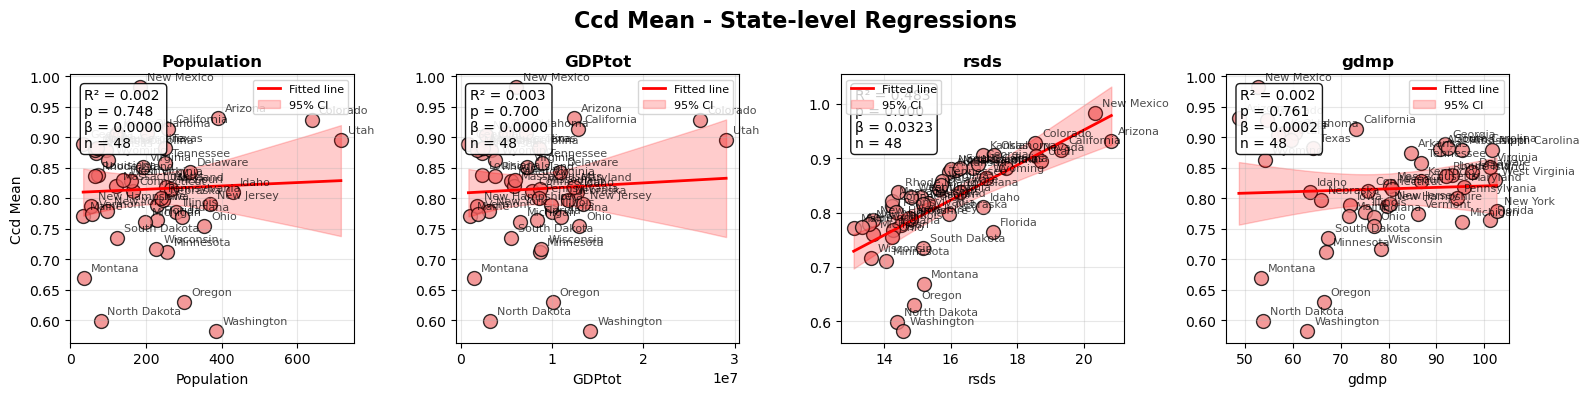


绘制 Environmental_improvement_mean 的州间回归图...


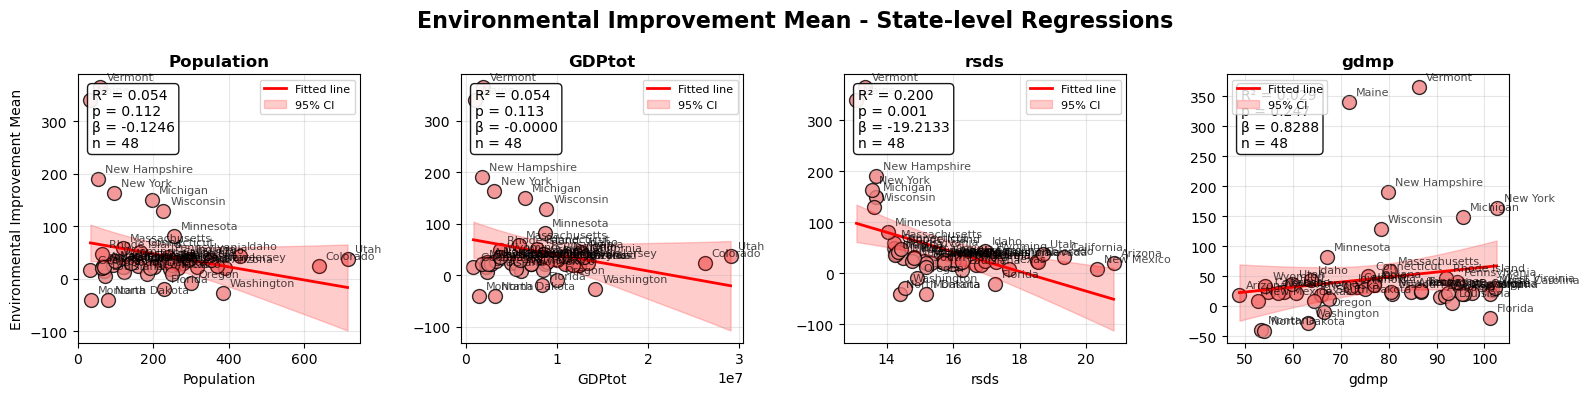


绘制 Emission_improvement_mean 的州间回归图...


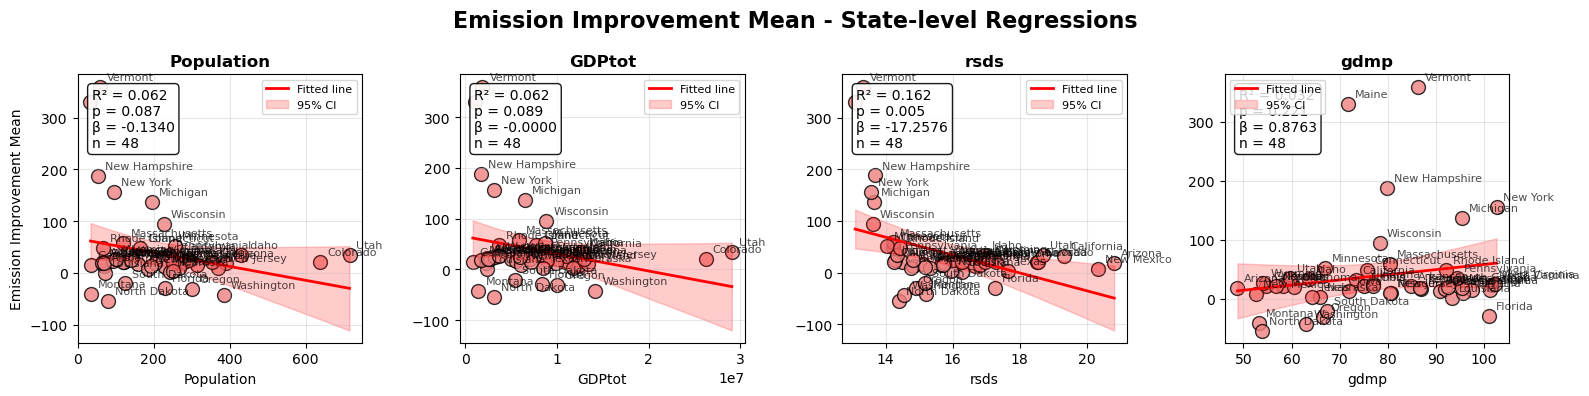


绘制 Economic_improvement_mean 的州间回归图...


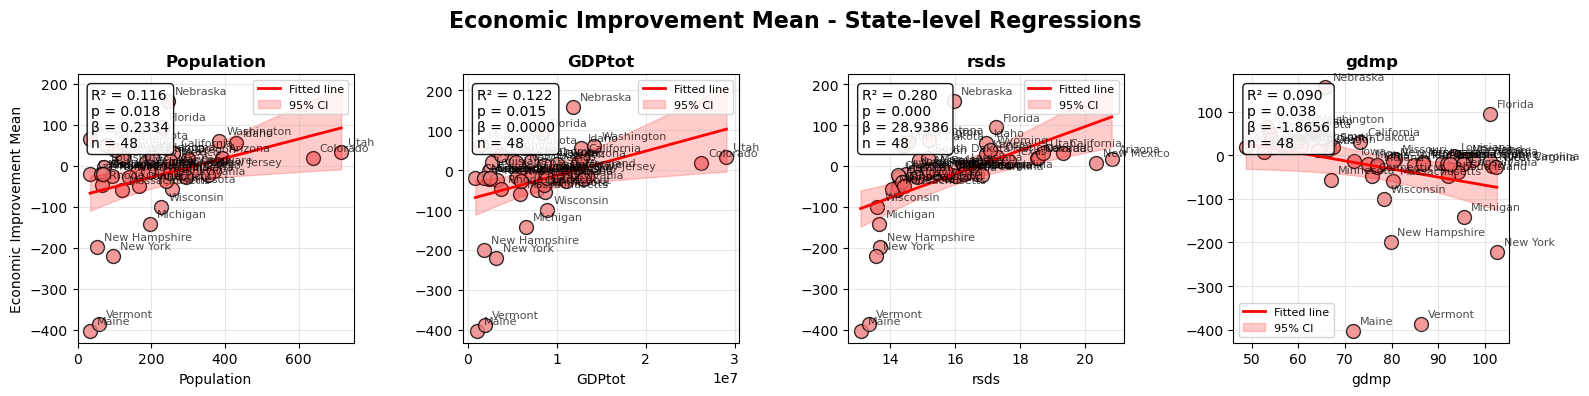


绘制 Overall_improvement_mean 的州间回归图...


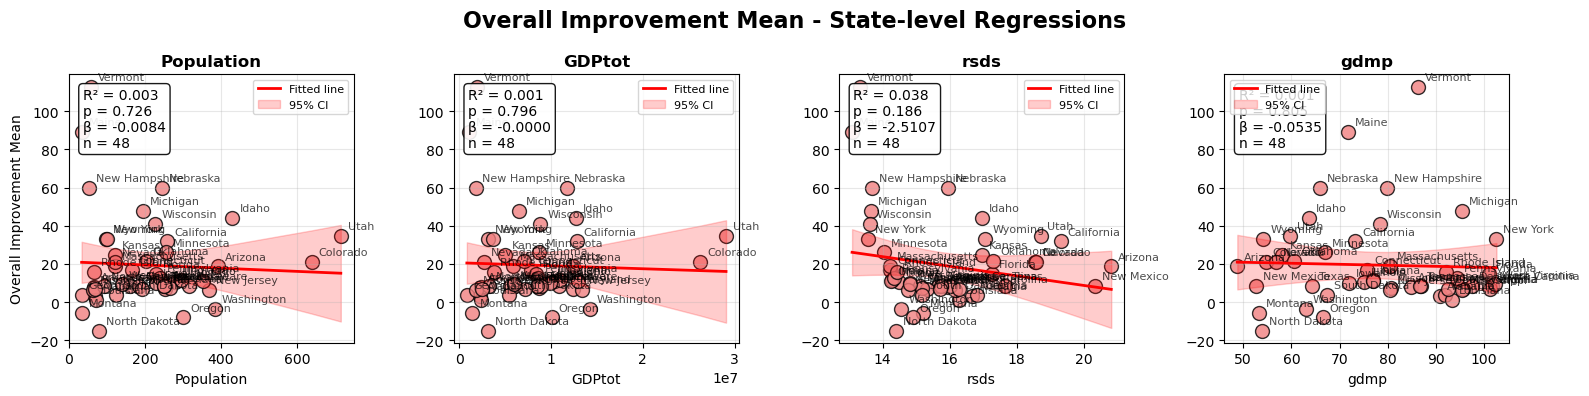


=== 州间回归汇总可视化 ===


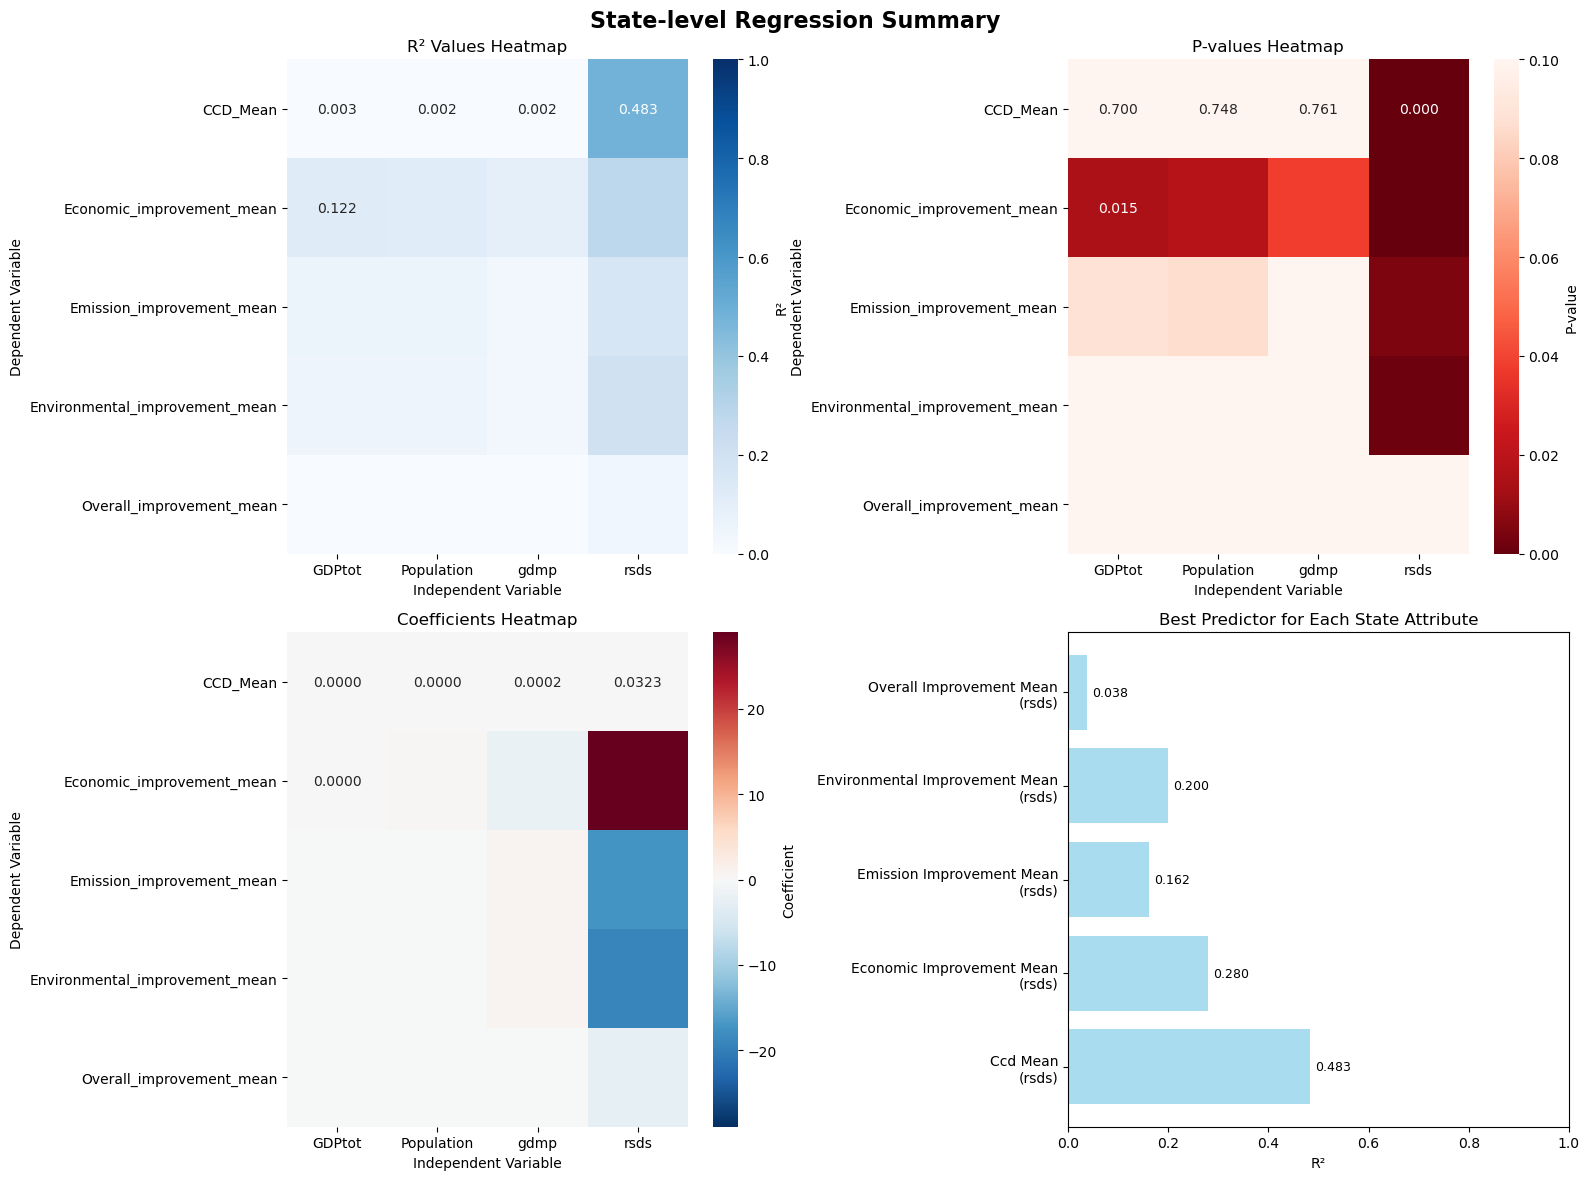


=== 保存州间回归结果 ===
州间回归结果已保存到: data/US_data/state_level_analysis


In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

def state_level_univariate_regression(
    data_for_regression,
    state_analysis_df,
    target_states=None,
    output_dir='data/US_data/state_level_analysis',
    enable_diagnostics=True
):
    """
    州间一元线性回归分析，包含散点图和拟合线
    """
    
    os.makedirs(output_dir, exist_ok=True)
    
    print("=== 州间一元线性回归分析开始 ===")
    
    # ===== 1. 数据准备 =====
    print("\n=== 数据准备 ===")
    
    # 定义变量
    pixel_vars = ['Population', 'GDPtot', 'rsds', 'gdmp']  # pixel级别自变量
    state_attrs = ['CCD_Mean', 'Environmental_improvement_mean', 
                   'Emission_improvement_mean', 'Economic_improvement_mean', 
                   'Overall_improvement_mean']  # 州属性
    
    # 检查可用变量
    available_pixel_vars = [v for v in pixel_vars if v in data_for_regression.columns]
    available_state_attrs = [v for v in state_attrs if v in state_analysis_df.columns]
    
    print(f"可用pixel变量: {available_pixel_vars}")
    print(f"可用州属性: {available_state_attrs}")
    
    # 合并数据
    if 'State_name' in state_analysis_df.columns:
        state_key = 'State_name'
    else:
        state_key = state_analysis_df.columns[0]
    
    merged_data = data_for_regression.merge(
        state_analysis_df[[state_key] + available_state_attrs],
        left_on='NAME',
        right_on=state_key,
        how='left'
    )
    
    # 应用目标州过滤
    if target_states is not None:
        print(f"\n=== 数据过滤：选择 {len(target_states)} 个州 ===")
        merged_data = merged_data[merged_data['NAME'].isin(target_states)].copy()
        print(f"过滤后数据形状: {merged_data.shape}")
    
    # 州级数据聚合
    state_aggregated = merged_data.groupby('NAME').agg({
        **{var: 'mean' for var in available_pixel_vars},  # pixel变量取均值
        **{attr: 'first' for attr in available_state_attrs},  # 州属性取第一个值
        'ccd_optimized': 'mean'  # CCD取均值
    }).reset_index()
    
    print(f"州级聚合数据形状: {state_aggregated.shape}")
    print("州级数据预览:")
    print(state_aggregated.head())
    
    # ===== 2. 州间一元线性回归 =====
    print("\n=== 州间一元线性回归分析 ===")
    
    state_models = {}
    state_results_summary = []
    
    # 对每个州属性进行一元回归
    for state_attr in available_state_attrs:
        print(f"\n--- 预测 {state_attr} ---")
        state_models[state_attr] = {}
        
        for pixel_var in available_pixel_vars:
            formula = f"{state_attr} ~ {pixel_var}"
            print(f"  {formula}")
            
            try:
                model = smf.ols(formula, data=state_aggregated).fit()
                state_models[state_attr][pixel_var] = model
                
                # 记录结果
                state_results_summary.append({
                    'dependent_var': state_attr,
                    'independent_var': pixel_var,
                    'r_squared': model.rsquared,
                    'adj_r_squared': model.rsquared_adj,
                    'f_pvalue': model.f_pvalue,
                    'coefficient': model.params[pixel_var],
                    'coeff_pvalue': model.pvalues[pixel_var],
                    'intercept': model.params['Intercept'],
                    'n_obs': int(model.nobs)
                })
                
                print(f"    R²: {model.rsquared:.4f}, p值: {model.f_pvalue:.4f}, 系数: {model.params[pixel_var]:.6f}")
                
            except Exception as e:
                print(f"    失败: {e}")
                state_models[state_attr][pixel_var] = None
    
    # ===== 3. 可视化：州间回归散点图和拟合线 =====
    print("\n=== 州间回归结果可视化 ===")
    
    # 为每个州属性创建一个大图，包含所有自变量的子图
    for state_attr in available_state_attrs:
        print(f"\n绘制 {state_attr} 的州间回归图...")
        
        n_vars = len(available_pixel_vars)
        
        # 创建子图布局（1行，n_vars列）
        fig, axes = plt.subplots(1, n_vars, figsize=(4*n_vars, 4))
        if n_vars == 1:
            axes = [axes]
        
        fig.suptitle(f'{state_attr.replace("_", " ").title()} - State-level Regressions', 
                     fontsize=16, fontweight='bold')
        
        for j, pixel_var in enumerate(available_pixel_vars):
            ax = axes[j]
            
            # 检查数据和模型是否存在
            if (state_attr in state_aggregated.columns and 
                pixel_var in state_aggregated.columns and
                state_attr in state_models and 
                pixel_var in state_models[state_attr]):
                
                model = state_models[state_attr][pixel_var]
                
                if model is not None:
                    # 绘制散点图（每个点代表一个州）
                    ax.scatter(state_aggregated[pixel_var], state_aggregated[state_attr], 
                              alpha=0.8, s=100, color='lightcoral', edgecolors='black', linewidth=1)
                    
                    # 添加州名标签
                    for idx, row in state_aggregated.iterrows():
                        ax.annotate(row['NAME'], 
                                   (row[pixel_var], row[state_attr]),
                                   xytext=(5, 5), textcoords='offset points',
                                   fontsize=8, alpha=0.7)
                    
                    # 绘制拟合线
                    x_range = np.linspace(state_aggregated[pixel_var].min(), 
                                        state_aggregated[pixel_var].max(), 100)
                    y_pred = model.params['Intercept'] + model.params[pixel_var] * x_range
                    ax.plot(x_range, y_pred, 'r-', linewidth=2, label='Fitted line')
                    
                    # 添加置信区间
                    try:
                        from statsmodels.stats.outliers_influence import summary_table
                        st, data, ss2 = summary_table(model, alpha=0.05)
                        fitted_values = data[:, 2]  # fitted values
                        predict_ci_low = data[:, 4]  # lower CI
                        predict_ci_upp = data[:, 5]  # upper CI
                        
                        # 排序以便绘制
                        sort_idx = np.argsort(state_aggregated[pixel_var])
                        x_sorted = state_aggregated[pixel_var].iloc[sort_idx]
                        ci_low_sorted = predict_ci_low[sort_idx]
                        ci_upp_sorted = predict_ci_upp[sort_idx]
                        
                        ax.fill_between(x_sorted, ci_low_sorted, ci_upp_sorted, 
                                       alpha=0.2, color='red', label='95% CI')
                    except:
                        pass  # 如果置信区间计算失败，跳过
                    
                    # 添加统计信息
                    stats_text = (f'R² = {model.rsquared:.3f}\n'
                                f'p = {model.f_pvalue:.3f}\n'
                                f'β = {model.params[pixel_var]:.4f}\n'
                                f'n = {int(model.nobs)}')
                    
                    ax.text(0.05, 0.95, stats_text, 
                           transform=ax.transAxes, fontsize=10, 
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.9),
                           verticalalignment='top')
                    
                    # 设置标题和标签
                    ax.set_title(f'{pixel_var}', fontsize=12, fontweight='bold')
                    ax.set_xlabel(f'{pixel_var}', fontsize=10)
                    if j == 0:
                        ax.set_ylabel(f'{state_attr.replace("_", " ").title()}', fontsize=10)
                    
                    # 设置网格和图例
                    ax.grid(True, alpha=0.3)
                    ax.legend(fontsize=8)
                
                else:
                    ax.text(0.5, 0.5, 'Model\nNot Available', ha='center', va='center', 
                           transform=ax.transAxes, fontsize=12)
                    ax.set_title(f'{pixel_var} (N/A)', fontsize=12)
            
            else:
                ax.text(0.5, 0.5, 'Data\nNot Available', ha='center', va='center', 
                       transform=ax.transAxes, fontsize=12)
                ax.set_title(f'{pixel_var} (N/A)', fontsize=12)
        
        plt.tight_layout()
        plt.savefig(f'{output_dir}/{state_attr}_state_level_regressions.png', 
                   dpi=300, bbox_inches='tight')
        plt.show()
    
    # ===== 4. 汇总可视化：R²和系数对比 =====
    print("\n=== 州间回归汇总可视化 ===")
    
    results_df = pd.DataFrame(state_results_summary)
    
    if len(results_df) > 0:
        # 创建汇总热力图
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('State-level Regression Summary', fontsize=16, fontweight='bold')
        
        # R²热力图
        ax1 = axes[0, 0]
        pivot_r2 = results_df.pivot(index='dependent_var', columns='independent_var', values='r_squared')
        sns.heatmap(pivot_r2, annot=True, fmt='.3f', cmap='Blues', 
                   vmin=0, vmax=1, ax=ax1, cbar_kws={'label': 'R²'})
        ax1.set_title('R² Values Heatmap')
        ax1.set_ylabel('Dependent Variable')
        ax1.set_xlabel('Independent Variable')
        
        # p值热力图
        ax2 = axes[0, 1]
        pivot_pval = results_df.pivot(index='dependent_var', columns='independent_var', values='f_pvalue')
        sns.heatmap(pivot_pval, annot=True, fmt='.3f', cmap='Reds_r', 
                   vmin=0, vmax=0.1, ax=ax2, cbar_kws={'label': 'P-value'})
        ax2.set_title('P-values Heatmap')
        ax2.set_ylabel('Dependent Variable')
        ax2.set_xlabel('Independent Variable')
        
        # 系数热力图
        ax3 = axes[1, 0]
        pivot_coeff = results_df.pivot(index='dependent_var', columns='independent_var', values='coefficient')
        max_abs_coeff = np.abs(pivot_coeff.values).max()
        sns.heatmap(pivot_coeff, annot=True, fmt='.4f', cmap='RdBu_r', 
                   center=0, vmin=-max_abs_coeff, vmax=max_abs_coeff,
                   ax=ax3, cbar_kws={'label': 'Coefficient'})
        ax3.set_title('Coefficients Heatmap')
        ax3.set_ylabel('Dependent Variable')
        ax3.set_xlabel('Independent Variable')
        
        # 最佳模型对比
        ax4 = axes[1, 1]
        best_models = results_df.loc[results_df.groupby('dependent_var')['r_squared'].idxmax()]
        
        y_pos = range(len(best_models))
        r2_values = best_models['r_squared'].values
        labels = [f"{row['dependent_var'].replace('_', ' ').title()}\n({row['independent_var']})" 
                 for _, row in best_models.iterrows()]
        
        bars = ax4.barh(y_pos, r2_values, alpha=0.7, color='skyblue')
        ax4.set_yticks(y_pos)
        ax4.set_yticklabels(labels, fontsize=10)
        ax4.set_xlabel('R²')
        ax4.set_title('Best Predictor for Each State Attribute')
        ax4.set_xlim(0, 1)
        
        # 添加数值标签
        for i, (bar, r2) in enumerate(zip(bars, r2_values)):
            ax4.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                    f'{r2:.3f}', va='center', fontsize=9)
        
        plt.tight_layout()
        plt.savefig(f'{output_dir}/state_level_regression_summary.png', 
                   dpi=300, bbox_inches='tight')
        plt.show()
    
    # ===== 5. 保存结果 =====
    print("\n=== 保存州间回归结果 ===")
    
    results_df = pd.DataFrame(state_results_summary)
    results_df.to_csv(f'{output_dir}/state_level_regression_summary.csv', index=False)
    
    # 保存详细模型结果
    for state_attr in available_state_attrs:
        if state_attr in state_models:
            attr_dir = f'{output_dir}/{state_attr}'
            os.makedirs(attr_dir, exist_ok=True)
            
            for pixel_var in available_pixel_vars:
                if pixel_var in state_models[state_attr]:
                    model = state_models[state_attr][pixel_var]
                    if model is not None:
                        # 保存模型摘要
                        with open(f'{attr_dir}/{state_attr}_{pixel_var}_summary.txt', 'w') as f:
                            f.write(str(model.summary()))
    
    print(f"州间回归结果已保存到: {output_dir}")
    
    return {
        'state_aggregated_data': state_aggregated,
        'state_models': state_models,
        'results_summary': results_df
    }

    
if __name__ == "__main__":
    # 州间一元线性回归
    print("=" * 50)
    print("执行州间一元线性回归")
    print("=" * 50)
    
    state_results = state_level_univariate_regression(
        data_for_regression=data_for_regression,
        state_analysis_df=state_analysis_df,
        target_states=None,
        output_dir='data/US_data/state_level_analysis'
    )


### 2.2.2 Within level regression


执行州内一元线性回归
=== 各州独立回归分析开始 ===

=== 数据准备 ===
可用自变量: ['Population', 'GDPtot', 'rsds', 'gdmp']
可用因变量: ['ccd_optimized', 'optimal_weight_environmental', 'optimal_weight_emission', 'optimal_weight_economic']

=== 数据过滤：选择 5 个州 ===
分析州列表: ['California', 'Texas', 'Utah', 'Indiana', 'Michigan']
数据形状: (18525, 45)

=== 各州独立回归分析 ===

==================== California ====================
California 数据量: 3941

--- California: 预测 ccd_optimized ---
  ccd_optimized ~ Population
    R²: 0.0439, p值: 0.0000, 系数: -0.000026
  ccd_optimized ~ GDPtot
    R²: 0.0698, p值: 0.0000, 系数: -0.000000
  ccd_optimized ~ rsds
    R²: 0.0613, p值: 0.0000, 系数: 0.020378
  ccd_optimized ~ gdmp
    R²: 0.0037, p值: 0.0001, 系数: -0.000189

--- California: 预测 optimal_weight_environmental ---
  optimal_weight_environmental ~ Population
    R²: 0.0001, p值: 0.5277, 系数: -0.000000
  optimal_weight_environmental ~ GDPtot
    R²: 0.0001, p值: 0.5822, 系数: -0.000000
  optimal_weight_environmental ~ rsds
    R²: 0.0061, p值: 0.0000, 系数: -0.00

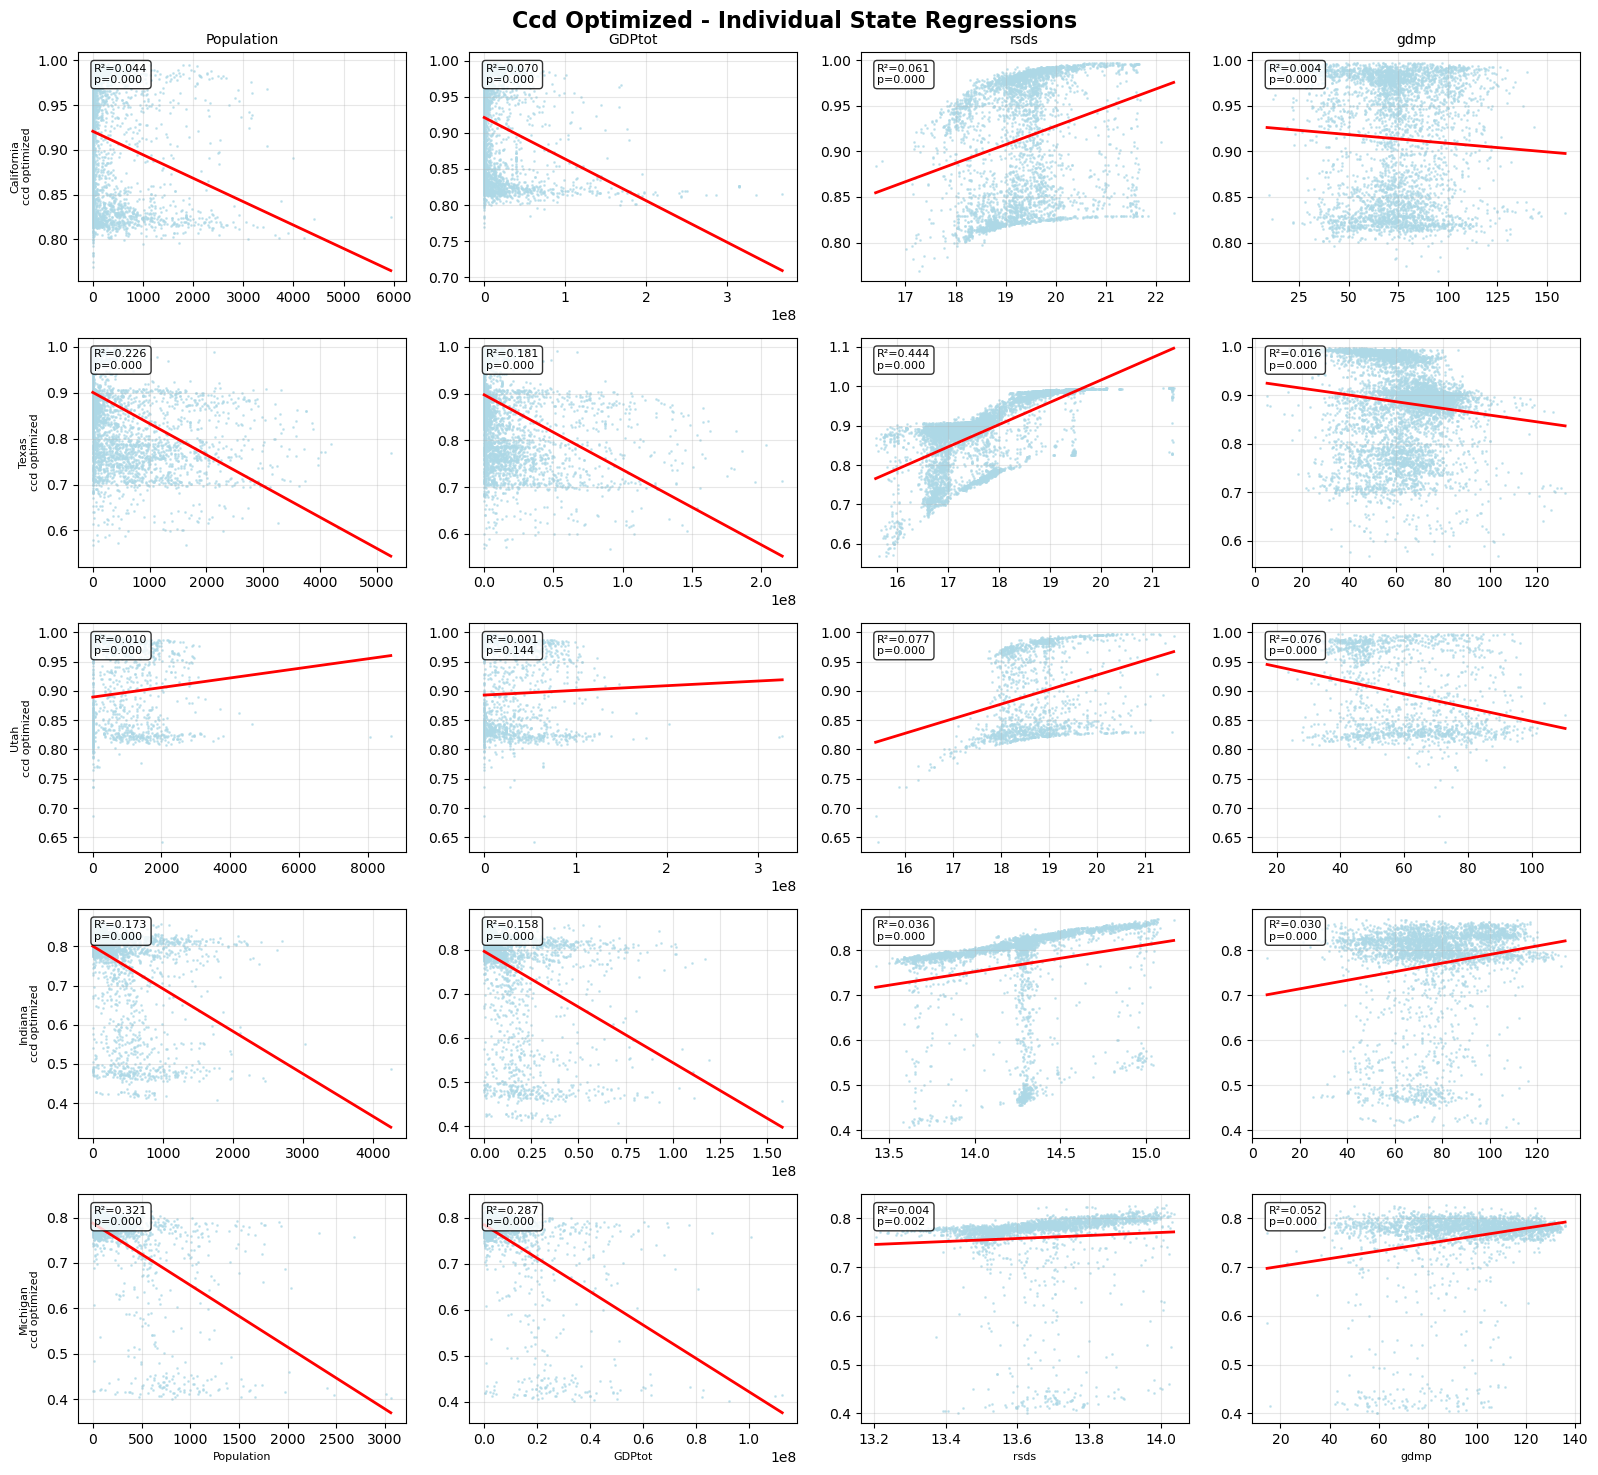


绘制 optimal_weight_environmental 的各州回归图...


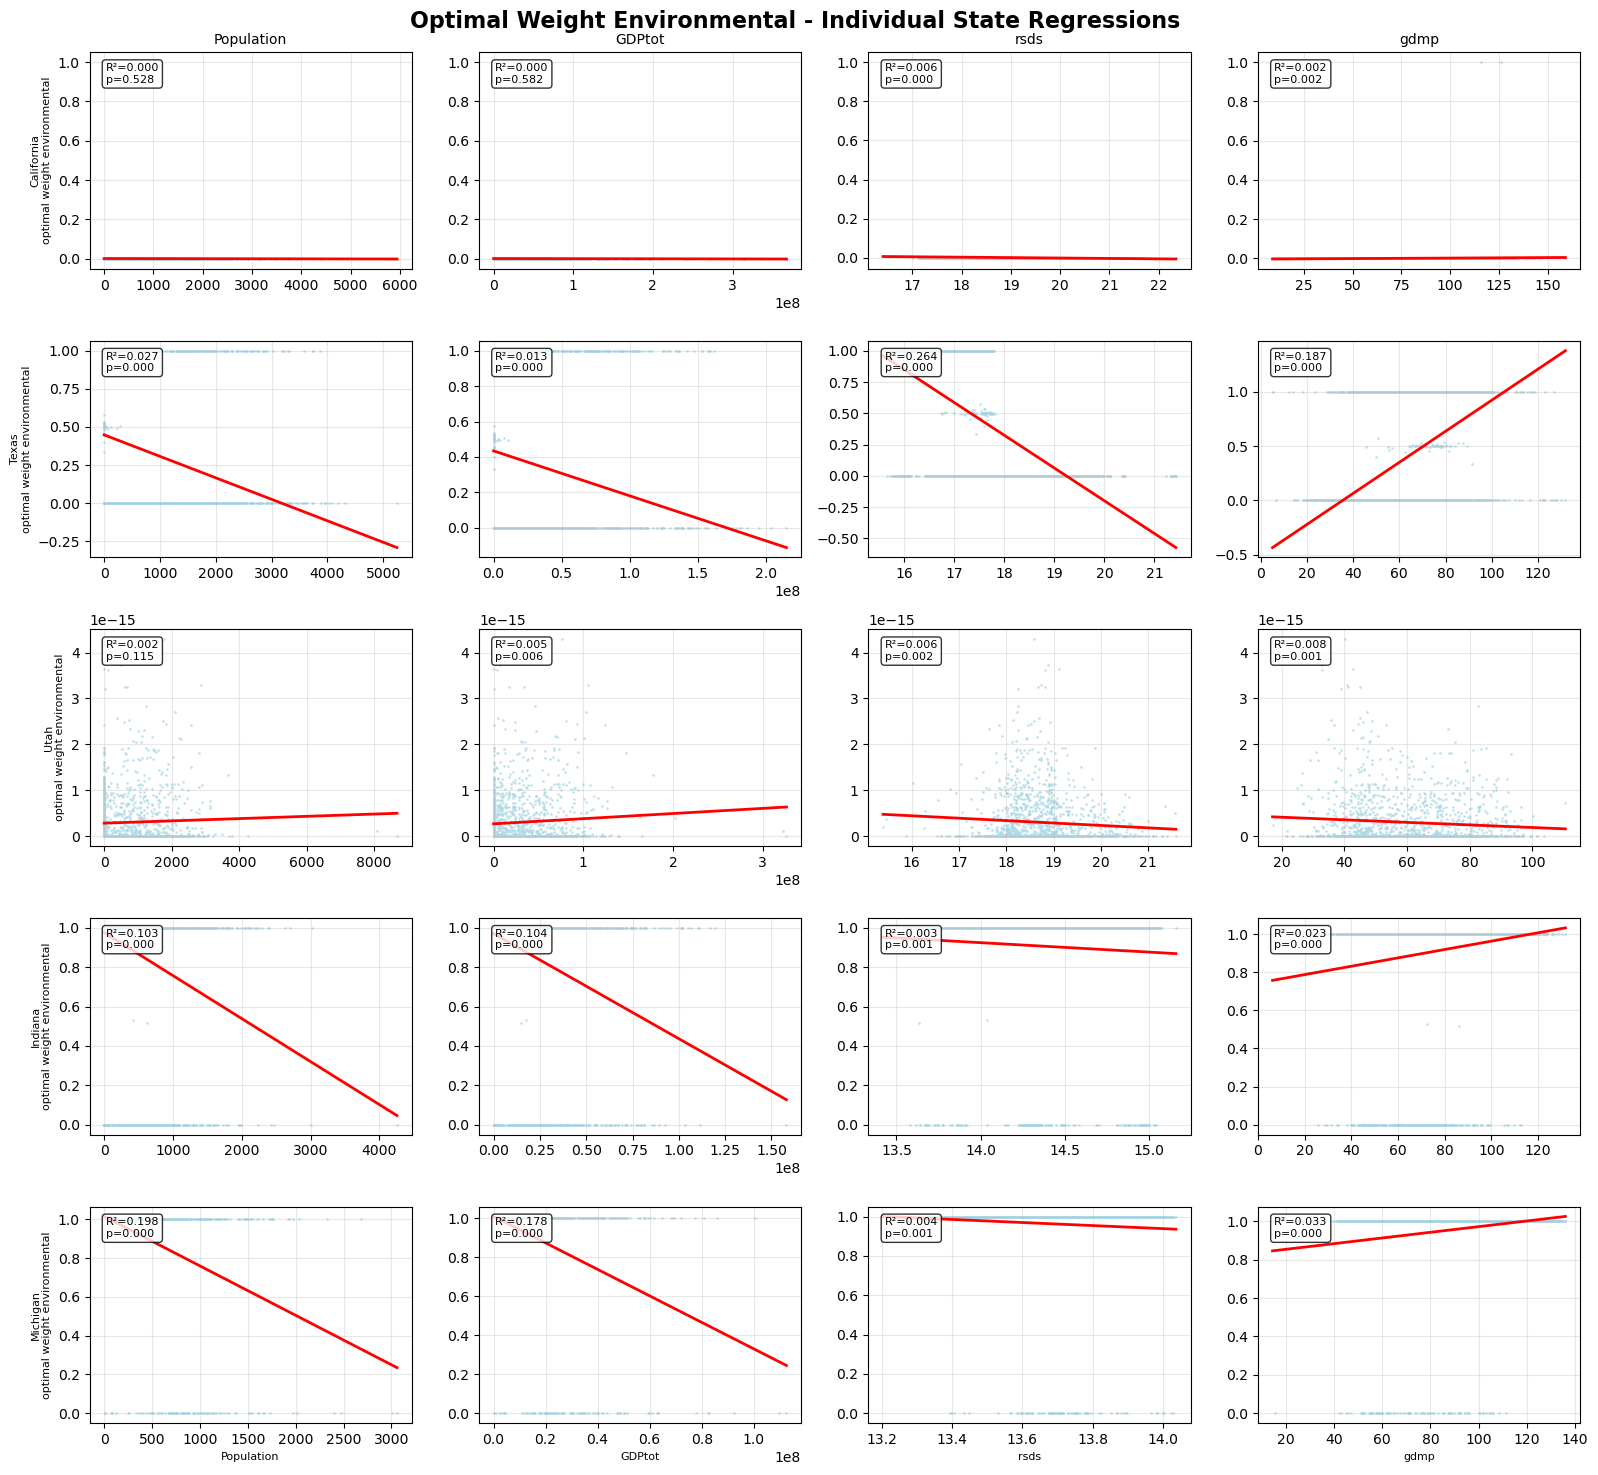


绘制 optimal_weight_emission 的各州回归图...


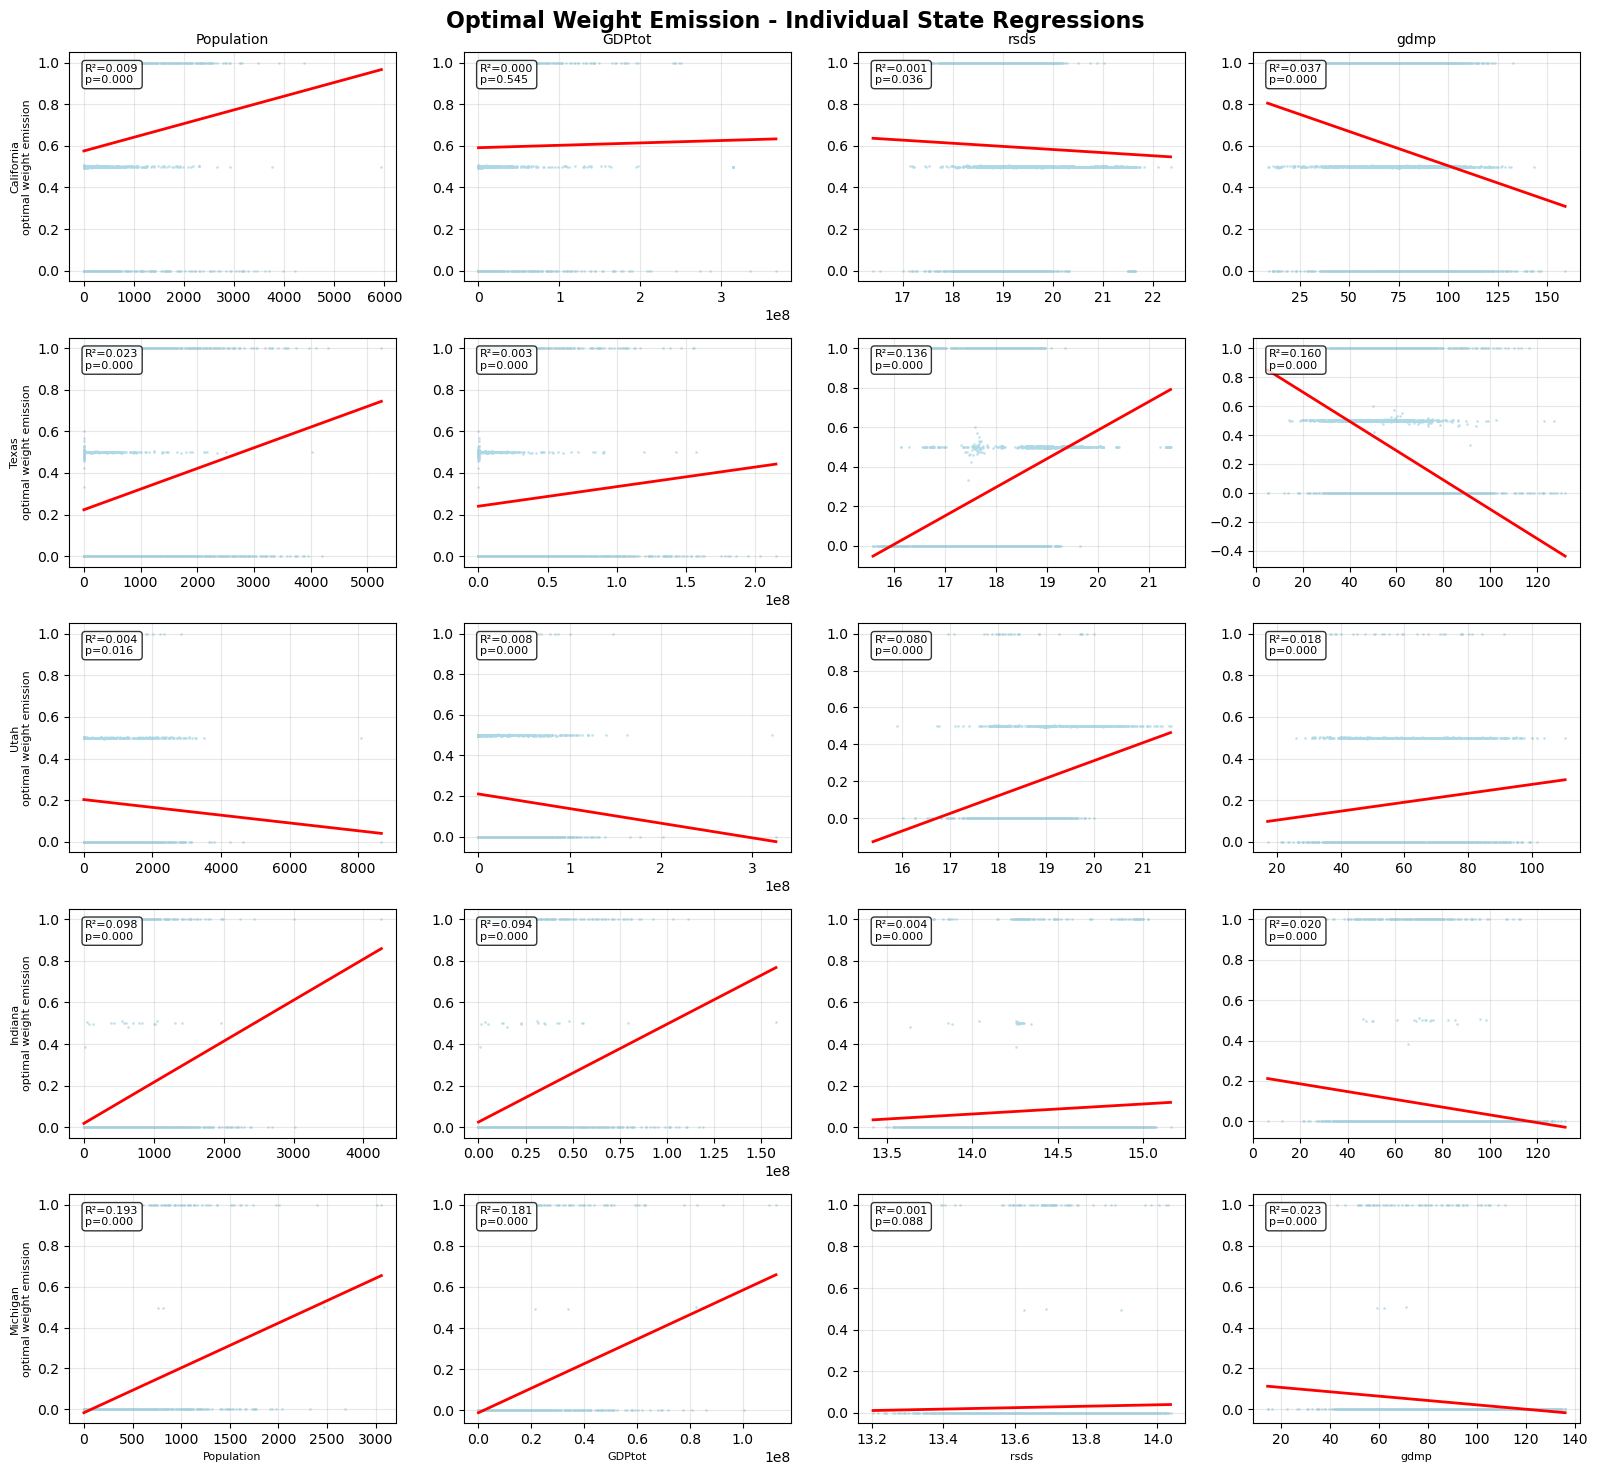


绘制 optimal_weight_economic 的各州回归图...


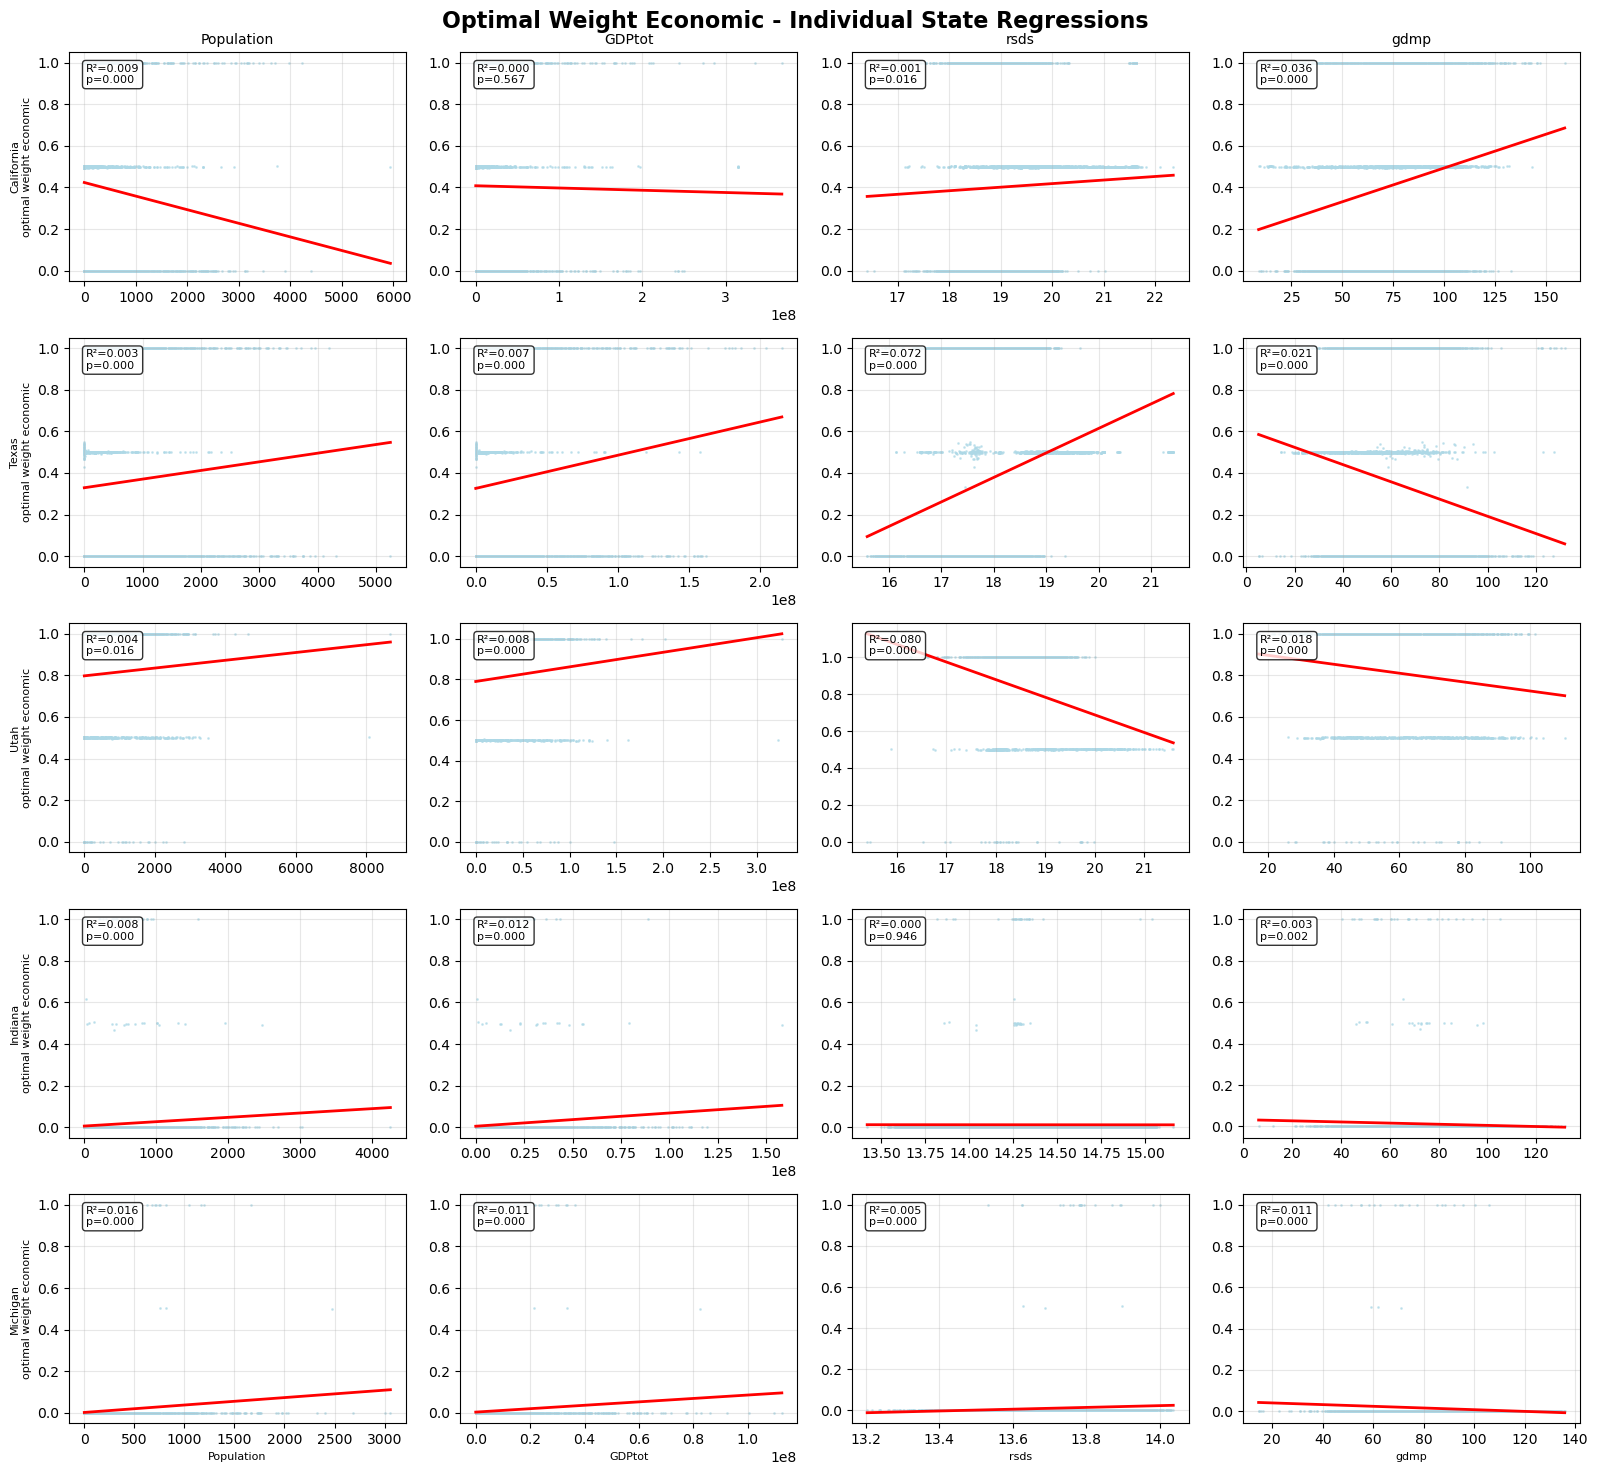


=== 各州R²对比可视化 ===


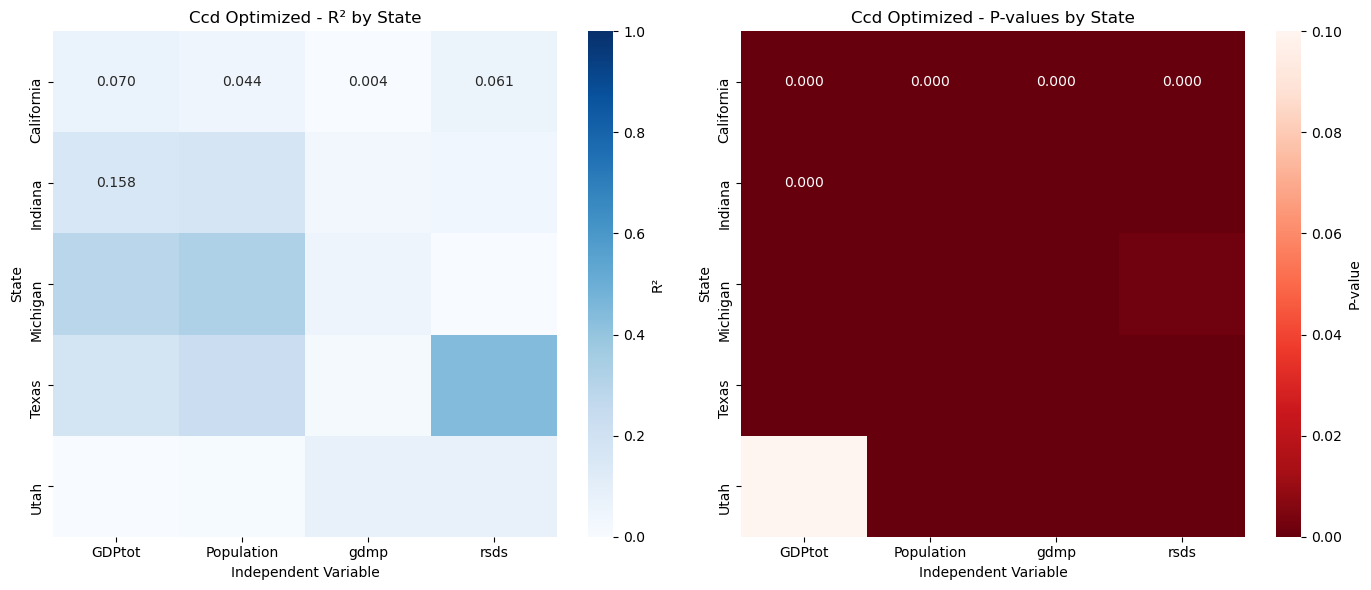

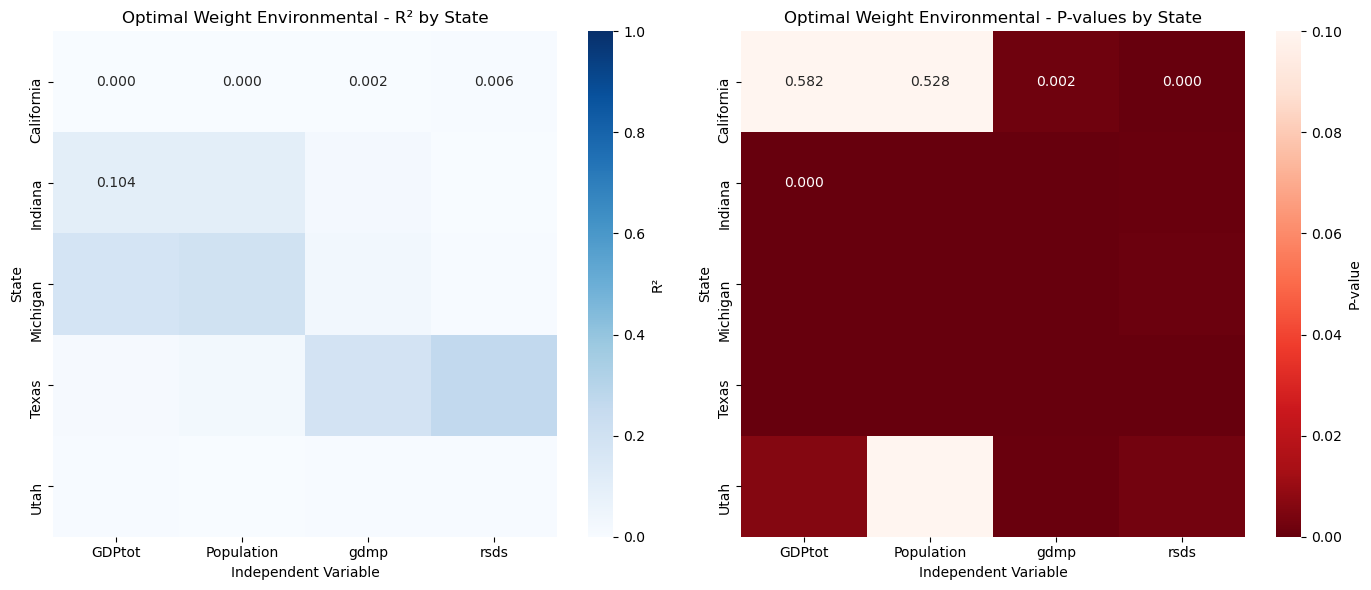

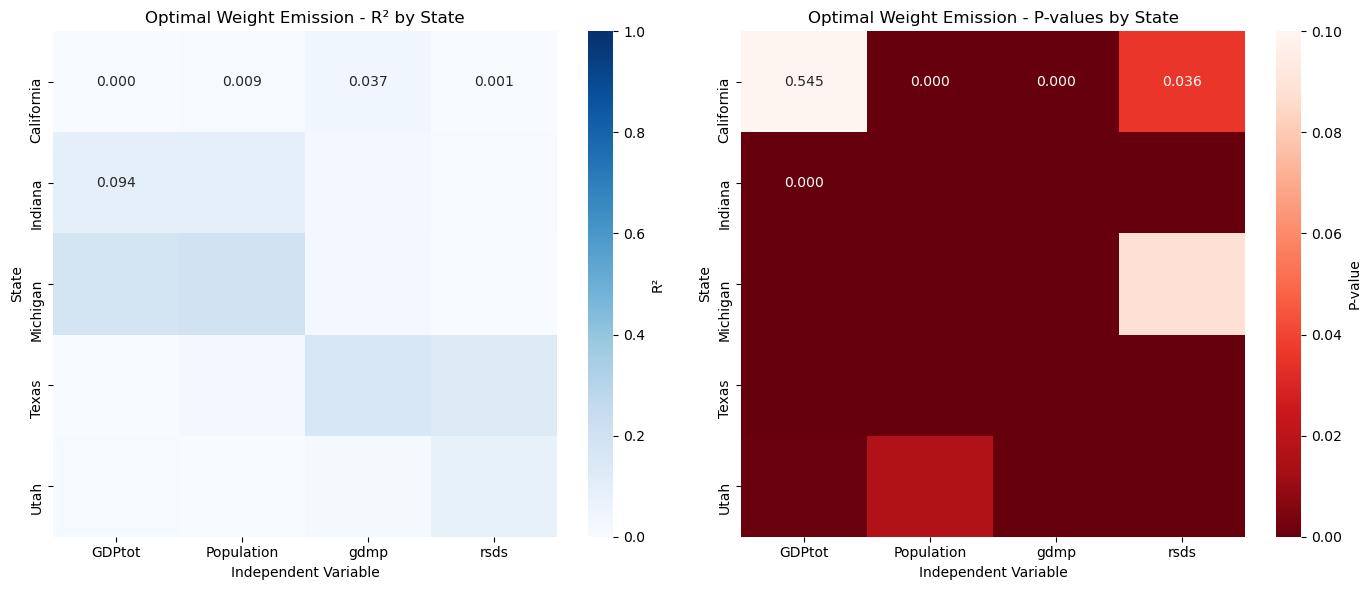

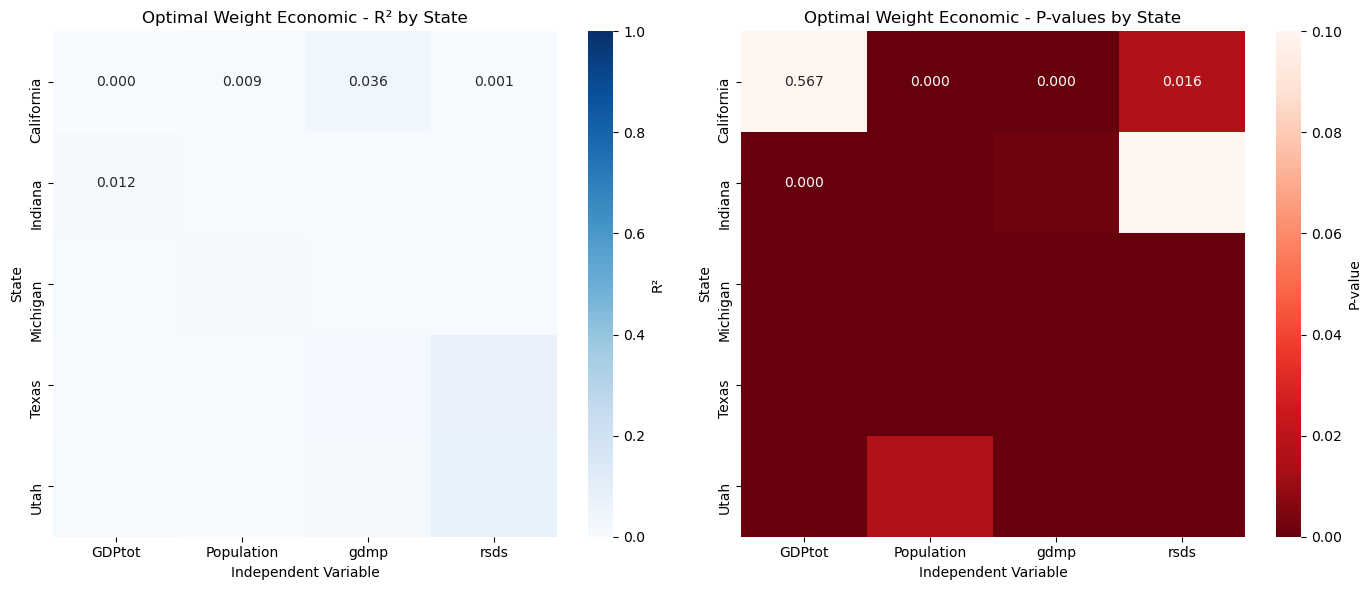


=== 保存结果 ===
各州独立回归结果已保存到: data/US_data/within_state_analysis

=== 所有分析完成 ===


In [34]:
def within_state_individual_regression(
    data_for_regression,
    target_states=None,
    output_dir='data/US_data/within_state_individual',
    enable_diagnostics=True
):
    """
    每个州单独进行州内一元线性回归分析
    
    参数:
    - data_for_regression: pixel级别数据
    - target_states: 目标州列表
    - output_dir: 输出目录
    """
    
    os.makedirs(output_dir, exist_ok=True)
    
    print("=== 各州独立回归分析开始 ===")
    
    # ===== 1. 数据准备 =====
    print("\n=== 数据准备 ===")
    
    # 定义变量
    pixel_vars = ['Population', 'GDPtot', 'rsds', 'gdmp']  # 自变量
    dependent_vars = ['ccd_optimized', 'optimal_weight_environmental', 
                     'optimal_weight_emission', 'optimal_weight_economic']  # 因变量
    
    # 检查可用变量
    available_pixel_vars = [v for v in pixel_vars if v in data_for_regression.columns]
    available_dependent_vars = [v for v in dependent_vars if v in data_for_regression.columns]
    
    print(f"可用自变量: {available_pixel_vars}")
    print(f"可用因变量: {available_dependent_vars}")
    
    # 应用目标州过滤
    if target_states is not None:
        print(f"\n=== 数据过滤：选择 {len(target_states)} 个州 ===")
        filtered_data = data_for_regression[data_for_regression['NAME'].isin(target_states)].copy()
        states_to_analyze = target_states
    else:
        filtered_data = data_for_regression.copy()
        states_to_analyze = filtered_data['NAME'].unique().tolist()
    
    print(f"分析州列表: {states_to_analyze}")
    print(f"数据形状: {filtered_data.shape}")
    
    # ===== 2. 每个州独立回归分析 =====
    print("\n=== 各州独立回归分析 ===")
    
    state_individual_models = {}
    state_results_summary = []
    
    for state in states_to_analyze:
        print(f"\n{'='*20} {state} {'='*20}")
        
        # 提取该州的数据
        state_data = filtered_data[filtered_data['NAME'] == state].copy()
        print(f"{state} 数据量: {len(state_data)}")
        
        if len(state_data) < 10:  # 最少需要10个观测值
            print(f"⚠️ {state} 数据量不足，跳过")
            continue
        
        state_individual_models[state] = {}
        
        # 对该州的每个因变量进行一元回归
        for dep_var in available_dependent_vars:
            print(f"\n--- {state}: 预测 {dep_var} ---")
            state_individual_models[state][dep_var] = {}
            
            for pixel_var in available_pixel_vars:
                formula = f"{dep_var} ~ {pixel_var}"
                print(f"  {formula}")
                
                try:
                    model = smf.ols(formula, data=state_data).fit()
                    state_individual_models[state][dep_var][pixel_var] = model
                    
                    # 记录结果
                    state_results_summary.append({
                        'state': state,
                        'dependent_var': dep_var,
                        'independent_var': pixel_var,
                        'r_squared': model.rsquared,
                        'adj_r_squared': model.rsquared_adj,
                        'f_pvalue': model.f_pvalue,
                        'coefficient': model.params[pixel_var],
                        'coeff_pvalue': model.pvalues[pixel_var],
                        'intercept': model.params['Intercept'],
                        'n_obs': int(model.nobs)
                    })
                    
                    print(f"    R²: {model.rsquared:.4f}, p值: {model.f_pvalue:.4f}, 系数: {model.params[pixel_var]:.6f}")
                    
                except Exception as e:
                    print(f"    失败: {e}")
                    state_individual_models[state][dep_var][pixel_var] = None
    
    # ===== 3. 可视化：每个州的散点图和拟合线 =====
    print("\n=== 各州回归结果可视化 ===")
    
    # 为每个因变量创建一个大图，包含所有州的子图
    for dep_var in available_dependent_vars:
        print(f"\n绘制 {dep_var} 的各州回归图...")
        
        n_states = len(states_to_analyze)
        n_vars = len(available_pixel_vars)
        
        # 创建子图布局
        fig, axes = plt.subplots(n_states, n_vars, figsize=(4*n_vars, 3*n_states))
        if n_states == 1:
            axes = axes.reshape(1, -1)
        if n_vars == 1:
            axes = axes.reshape(-1, 1)
        
        fig.suptitle(f'{dep_var.replace("_", " ").title()} - Individual State Regressions', 
                     fontsize=16, fontweight='bold')
        
        for i, state in enumerate(states_to_analyze):
            state_data = filtered_data[filtered_data['NAME'] == state]
            
            for j, pixel_var in enumerate(available_pixel_vars):
                ax = axes[i, j]
                
                if len(state_data) > 0 and dep_var in state_data.columns and pixel_var in state_data.columns:
                    # 绘制散点图
                    ax.scatter(state_data[pixel_var], state_data[dep_var], 
                              alpha=0.6, s=1, color='lightblue')
                    
                    # 获取模型并绘制拟合线
                    if (state in state_individual_models and 
                        dep_var in state_individual_models[state] and 
                        pixel_var in state_individual_models[state][dep_var]):
                        
                        model = state_individual_models[state][dep_var][pixel_var]
                        if model is not None:
                            # 绘制拟合线
                            x_range = np.linspace(state_data[pixel_var].min(), 
                                                state_data[pixel_var].max(), 100)
                            y_pred = model.params['Intercept'] + model.params[pixel_var] * x_range
                            ax.plot(x_range, y_pred, 'r-', linewidth=2)
                            
                            # 添加R²和p值信息
                            ax.text(0.05, 0.95, f'R²={model.rsquared:.3f}\np={model.f_pvalue:.3f}', 
                                   transform=ax.transAxes, fontsize=8, 
                                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                                   verticalalignment='top')
                
                # 设置标题和标签
                if i == 0:
                    ax.set_title(f'{pixel_var}', fontsize=10)
                if j == 0:
                    ax.set_ylabel(f'{state}\n{dep_var.replace("_", " ")}', fontsize=8)
                if i == n_states - 1:
                    ax.set_xlabel(pixel_var, fontsize=8)
                
                # 设置网格
                ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'{output_dir}/{dep_var}_individual_state_regressions.png', 
                   dpi=300, bbox_inches='tight')
        plt.show()
    
    # ===== 4. 汇总可视化：各州R²对比 =====
    print("\n=== 各州R²对比可视化 ===")
    
    # 转换为DataFrame便于可视化
    results_df = pd.DataFrame(state_results_summary)
    
    if len(results_df) > 0:
        # 为每个因变量创建R²对比图
        for dep_var in available_dependent_vars:
            dep_data = results_df[results_df['dependent_var'] == dep_var]
            
            if len(dep_data) > 0:
                # 创建透视表
                pivot_r2 = dep_data.pivot(index='state', columns='independent_var', values='r_squared')
                pivot_pval = dep_data.pivot(index='state', columns='independent_var', values='f_pvalue')
                
                # 绘制热力图
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
                
                # R²热力图
                sns.heatmap(pivot_r2, annot=True, fmt='.3f', cmap='Blues', 
                           vmin=0, vmax=1, ax=ax1, cbar_kws={'label': 'R²'})
                ax1.set_title(f'{dep_var.replace("_", " ").title()} - R² by State')
                ax1.set_ylabel('State')
                ax1.set_xlabel('Independent Variable')
                
                # p值热力图
                sns.heatmap(pivot_pval, annot=True, fmt='.3f', cmap='Reds_r', 
                           vmin=0, vmax=0.1, ax=ax2, cbar_kws={'label': 'P-value'})
                ax2.set_title(f'{dep_var.replace("_", " ").title()} - P-values by State')
                ax2.set_ylabel('State')
                ax2.set_xlabel('Independent Variable')
                
                plt.tight_layout()
                plt.savefig(f'{output_dir}/{dep_var}_state_comparison.png', 
                           dpi=300, bbox_inches='tight')
                plt.show()
    
    # ===== 5. 保存结果 =====
    print("\n=== 保存结果 ===")
    
    results_df = pd.DataFrame(state_results_summary)
    results_df.to_csv(f'{output_dir}/individual_state_regression_summary.csv', index=False)
    
    # 保存每个州的详细结果
    for state in states_to_analyze:
        if state in state_individual_models:
            state_dir = f'{output_dir}/{state}'
            os.makedirs(state_dir, exist_ok=True)
            
            # 为该州创建详细报告
            state_report = []
            for dep_var in available_dependent_vars:
                if dep_var in state_individual_models[state]:
                    for pixel_var in available_pixel_vars:
                        if pixel_var in state_individual_models[state][dep_var]:
                            model = state_individual_models[state][dep_var][pixel_var]
                            if model is not None:
                                # 保存模型摘要
                                with open(f'{state_dir}/{dep_var}_{pixel_var}_summary.txt', 'w') as f:
                                    f.write(str(model.summary()))
                                
                                state_report.append({
                                    'dependent_var': dep_var,
                                    'independent_var': pixel_var,
                                    'r_squared': model.rsquared,
                                    'adj_r_squared': model.rsquared_adj,
                                    'f_pvalue': model.f_pvalue,
                                    'coefficient': model.params[pixel_var],
                                    'coeff_pvalue': model.pvalues[pixel_var],
                                    'intercept': model.params['Intercept']
                                })
            
            # 保存该州的汇总结果
            if state_report:
                pd.DataFrame(state_report).to_csv(f'{state_dir}/{state}_regression_summary.csv', index=False)
    
    print(f"各州独立回归结果已保存到: {output_dir}")
    
    return {
        'filtered_data': filtered_data,
        'state_individual_models': state_individual_models,
        'results_summary': results_df,
        'states_analyzed': states_to_analyze
    }


# ===== 使用示例 =====
if __name__ == "__main__":

    
    # 州内一元线性回归
    print("\n" + "=" * 50)
    print("执行州内一元线性回归")
    print("=" * 50)
    
    within_results = within_state_individual_regression(
        data_for_regression=data_for_regression,
        target_states=['California', 'Texas', 'Utah', 'Indiana', 'Michigan'],
        output_dir='data/US_data/within_state_analysis'
    )
    
    print("\n=== 所有分析完成 ===")

## 2.3 Analysis for state

In [6]:

# ===== 1. 数据准备 =====
target_states=['California', 'Texas', 'Utah', 'Indiana', 'Michigan']

# 定义变量
pixel_vars = ['Population', 'GDPtot', 'rsds', 'gdmp']  # pixel级别自变量
state_attrs = ['CCD_Mean', 'Environmental_improvement_mean', 
                'Emission_improvement_mean', 'Economic_improvement_mean', 
                'Overall_improvement_mean']  # 州属性

# 检查可用变量
available_pixel_vars = [v for v in pixel_vars if v in data_for_regression.columns]
available_state_attrs = [v for v in state_attrs if v in state_analysis_df.columns]

# 合并数据
if 'State_name' in state_analysis_df.columns:
    state_key = 'State_name'
else:
    state_key = state_analysis_df.columns[0]

merged_data = data_for_regression.merge(
    state_analysis_df[[state_key] + available_state_attrs],
    left_on='NAME',
    right_on=state_key,
    how='left'
)

# 应用目标州过滤
if target_states is not None:
    print(f"\n=== 数据过滤：选择 {len(target_states)} 个州 ===")
    merged_data = merged_data[merged_data['NAME'].isin(target_states)].copy()
    print(f"过滤后数据形状: {merged_data.shape}")

# 州级数据聚合
state_aggregated = merged_data.groupby('NAME').agg({
    **{var: 'mean' for var in available_pixel_vars},  # pixel变量取均值
    **{attr: 'first' for attr in available_state_attrs},  # 州属性取第一个值
    'ccd_optimized': 'mean'  # CCD取均值
}).reset_index()


state_aggregated


=== 数据过滤：选择 5 个州 ===
过滤后数据形状: (18525, 51)


NAME  Population        GDPtot       rsds       gdmp  CCD_Mean  \
0  California  259.213389  1.279978e+07  19.321493  73.279853    0.9144   
1     Indiana  294.027607  1.100003e+07  14.271280  76.936891    0.7689   
2    Michigan  196.089016  6.516150e+06  13.663703  95.430030    0.7608   
3       Texas  251.236109  8.515974e+06  17.666236  64.327729    0.8826   
4        Utah  715.389347  2.906446e+07  18.714933  59.720436    0.8953   

   Environmental_improvement_mean  Emission_improvement_mean  \
0                       32.838433                  31.862149   
1                       37.156549                  25.382338   
2                      149.593796                 136.175500   
3                        9.409449                   3.229177   
4                       37.513439                  34.178690   

   Economic_improvement_mean  Overall_improvement_mean  ccd_optimized  
0                  30.635449                 31.778677       0.913987  
1                 -27.806939                 11.577316       0.768586  
2                -142.422897                 47.782133       0.760868  
3                  12.179348                  8.272658       0.883671  
4                  32.859478                 34.850536       0.895288

### 2.3.1 决策模式

In [18]:
    # dependent_vars = ['ccd_optimized', 'optimal_weight_environmental', 
    #                  'optimal_weight_emission', 'optimal_weight_economic'] 

# 计算各州像元级变量的均值
state_means = data_for_regression.groupby('NAME')['optimal_weight_economic'].mean().round(2).reset_index()
state_means


NAME  optimal_weight_economic
0          Alabama                     0.01
1          Arizona                     0.37
2         Arkansas                     0.00
3       California                     0.41
4         Colorado                     0.44
5      Connecticut                     0.00
6         Delaware                     0.07
7          Florida                     0.67
8          Georgia                     0.00
9            Idaho                     0.50
10        Illinois                     0.03
11         Indiana                     0.01
12            Iowa                     0.03
13          Kansas                     0.07
14        Kentucky                     0.00
15       Louisiana                     0.11
16           Maine                     0.00
17        Maryland                     0.05
18   Massachusetts                     0.00
19        Michigan                     0.01
20       Minnesota                     0.11
21     Mississippi                     0.00
22        Missouri                     0.03
23         Montana                     0.06
24        Nebraska                     0.20
25          Nevada                     0.68
26   New Hampshire                     0.00
27      New Jersey                     0.01
28      New Mexico                     0.51
29        New York                     0.00
30  North Carolina                     0.02
31    North Dakota                     0.20
32            Ohio                     0.04
33        Oklahoma                     0.02
34          Oregon                     0.13
35    Pennsylvania                     0.00
36    Rhode Island                     0.00
37  South Carolina                     0.02
38    South Dakota                     0.06
39       Tennessee                     0.00
40           Texas                     0.34
41            Utah                     0.81
42         Vermont                     0.00
43        Virginia                     0.02
44      Washington                     0.08
45   West Virginia                     0.00
46       Wisconsin                     0.05
47         Wyoming                     0.28

In [ ]:
# 计算所有州的情况查看大概
import scipy.stats as stats

def mean_ci(series, alpha=0.05):
    arr = series.dropna()
    mean = arr.mean()
    sem = stats.sem(arr)
    ci = stats.t.interval(1-alpha, len(arr)-1, loc=mean, scale=sem) if len(arr) > 1 else (mean, mean)
    return mean, ci

for label, col in [
    ('economic', 'optimal_weight_economic'),
    ('emission', 'optimal_weight_emission'),
    ('environmental', 'optimal_weight_environmental')
]:
    mean, (low, high) = mean_ci(data_for_regression[col])
    print(f"{label.capitalize()} weight: {mean:.2f} (95% CI: {low:.2f} ~ {high:.2f})")


Economic weight: 0.16 (95% CI: 0.16 ~ 0.16)
Emission weight: 0.25 (95% CI: 0.24 ~ 0.25)
Environmental weight: 0.59 (95% CI: 0.59 ~ 0.60)


In [28]:
target_states = ['California', 'Texas', 'Utah', 'Indiana', 'Michigan']
state_means = (
    data_for_regression[data_for_regression['NAME'].isin(target_states)]
    .groupby('NAME')[['optimal_weight_economic', 'optimal_weight_emission', 'optimal_weight_environmental']]
    .mean().round(2).reset_index()
)
state_means

NAME  optimal_weight_economic  optimal_weight_emission  \
0  California                     0.41                     0.59   
1     Indiana                     0.01                     0.08   
2    Michigan                     0.01                     0.03   
3       Texas                     0.34                     0.25   
4        Utah                     0.81                     0.19   

   optimal_weight_environmental  
0                          0.00  
1                          0.91  
2                          0.97  
3                          0.41  
4                          0.00

### 2.3.2 决策因子